# Parcial 1. ¡El mejor celular para Mamá!

MINE-4101: Applied Data Science  
Univerisdad de los Andes

Lizeth Viviana Perdomo Castañeda  
  
**Dataset:** 
1. Listado de publicaciones de dispositivos móviles
2. Detalle de las características de los dispositivos móviles
3. Información básica de vendedores

**Objetivo:** Seleccionar la mejor opción de regalo para Mamá teniendo en cuenta las condiciones de compra deseadas y los diferentes tipos de dispositivos móviles. 

Last update: September, 2024

In [1]:
import pip

%pip install seaborn
%pip install mlxtend
%pip install networkx


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from IPython.display import Image
import re


In [3]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

### 1. Cargue de los datos

In [4]:
# Cargue de los archivos json y conversión a un DataFrame de Pandas

ruta_archivo_1 = r'C:\Users\lperd\OneDrive - Universidad de los andes\MINE 2024-2\CIENCIA DE DATOS APLICADA\Examen\items.json'


with open(ruta_archivo_1, 'r', encoding='utf-8') as archivo_1:
    celulares = json.load(archivo_1)

celulares_df = pd.DataFrame(celulares)
celulares_df.shape


(984, 45)

In [5]:
ruta_archivo_2 = r'C:\Users\lperd\OneDrive - Universidad de los andes\MINE 2024-2\CIENCIA DE DATOS APLICADA\Examen\search_results.json'


with open(ruta_archivo_2, 'r', encoding='utf-8') as archivo_2:
    caracteristicas = json.load(archivo_2)

caracteristicas_df = pd.DataFrame(caracteristicas)
caracteristicas_df.shape

(984, 36)

In [6]:
ruta_archivo_3 = r'C:\Users\lperd\OneDrive - Universidad de los andes\MINE 2024-2\CIENCIA DE DATOS APLICADA\Examen\sellers.json'


with open(ruta_archivo_3, 'r', encoding='utf-8') as archivo_3:
    vendedores = json.load(archivo_3)

vendedores_df = pd.DataFrame(vendedores)
vendedores_df.shape

(212, 9)

### 2. Entendimiento inicial de los datos

In [7]:
celulares_df.head()

,id,site_id,title,seller_id,category_id,official_store_id,price,base_price,original_price,currency_id,initial_quantity,sale_terms,buying_mode,listing_type_id,condition,permalink,thumbnail_id,thumbnail,pictures,video_id,descriptions,accepts_mercadopago,non_mercado_pago_payment_methods,shipping,international_delivery_mode,seller_address,seller_contact,location,coverage_areas,attributes,listing_source,variations,status,sub_status,tags,warranty,catalog_product_id,domain_id,parent_item_id,deal_ids,automatic_relist,date_created,last_updated,health,catalog_listing
0,MCO2496457152,MCO,Teléfono Inteligente I14 Pro Max Para Android ...,1757204237,MCO1055,NaN,321887,321887,NaN,COP,400,"[{'id': 'WARRANTY_TYPE', 'name': 'Tipo de gara...",buy_it_now,gold_pro,new,https://articulo.mercadolibre.com.co/MCO-24964...,704278-CBT77196112918_072024,http://http2.mlstatic.com/D_704278-CBT77196112...,"[{'id': '704278-CBT77196112918_072024', 'url':...",None,[],True,[],"{'mode': 'me2', 'methods': [], 'tags': ['manda...",DDP,"{'city': {'id': 'Q04tR0RTaGVuemhlbg', 'name': ...",None,{},[],"[{'id': 'ACCESSORIES_INCLUDED', 'name': 'Acces...",,"[{'id': 183458924907, 'price': 321887, 'attrib...",active,[],"[cbt_item, catalog_listing_eligible, good_qual...",Garantía del vendedor: 60 días,MCO26683909,MCO-CELLPHONES,None,[],False,2024-07-02T18:01:35.696Z,2024-09-21T14:49:03.811Z,0.77,False
1,MCO1468027022,MCO,Celular 4g Teclas Grandes Adulto Mayor Fm Lint...,74858296,MCO1055,NaN,299999,299999,NaN,COP,12,"[{'id': 'WARRANTY_TYPE', 'name': 'Tipo de gara...",buy_it_now,gold_special,new,https://articulo.mercadolibre.com.co/MCO-14680...,640212-MCO54960987110_042023,http://http2.mlstatic.com/D_640212-MCO54960987...,"[{'id': '640212-MCO54960987110_042023', 'url':...",None,[],True,[],"{'mode': 'me2', 'methods': [], 'tags': ['manda...",none,"{'city': {'id': 'TUNPQ0tFTjQyODYy', 'name': 'K...",None,{},[],"[{'id': 'ACCESSORIES_INCLUDED', 'name': 'Acces...",,"[{'id': 178017181497, 'price': 299999, 'attrib...",active,[],"[good_quality_thumbnail, immediate_payment, ca...",Garantía del vendedor: 3 meses,None,MCO-CELLPHONES,None,[],False,2023-04-18T16:13:28.000Z,2024-07-23T10:42:48.665Z,0.80,False
2,MCO2312649730,MCO,Celular Tecno Camon 30 + Buds,224855110,MCO1055,NaN,870000,870000,NaN,COP,11,"[{'id': 'WARRANTY_TYPE', 'name': 'Tipo de gara...",buy_it_now,gold_special,new,https://articulo.mercadolibre.com.co/MCO-23126...,730936-MCO75643494203_042024,http://http2.mlstatic.com/D_730936-MCO75643494...,"[{'id': '765605-MCO75643920657_042024', 'url':...",None,[],True,[],"{'mode': 'me2', 'methods': [], 'tags': ['self_...",none,"{'city': {'id': 'TUNPQ0FOVDMyNjIx', 'name': 'A...",None,{},[],"[{'id': 'ACCESSORIES_INCLUDED', 'name': 'Acces...",,"[{'id': 182383392891, 'price': 870000, 'attrib...",active,[],"[good_quality_thumbnail, immediate_payment, ca...",Garantía de fábrica: 12 meses,None,MCO-CELLPHONES,None,[],False,2024-04-07T15:38:43.630Z,2024-09-13T08:52:56.526Z,0.90,False
3,MCO2613414884,MCO,Infinix Smart 8 Pro Dual Sim 256 Gb Negro 8 Gb...,244320949,MCO1055,NaN,600000,600000,NaN,COP,1,"[{'id': 'WARRANTY_TYPE', 'name': 'Tipo de gara...",buy_it_now,gold_pro,new,https://articulo.mercadolibre.com.co/MCO-26134...,887258-MLA77434202893_072024,http://http2.mlstatic.com/D_887258-MLA77434202...,"[{'id': '887258-MLA77434202893_072024', 'url':...",None,[],True,[],"{'mode': 'me2', 'methods': [], 'tags': ['self_...",none,"{'city': {'id': 'TUNPQ1JBRjkyNTA2', 'name': 'R...",None,{},[],"[{'id': 'BATTERY_CAPACITY', 'name': 'Capacidad...",,[],active,[],"[good_quality_thumbnail, immediate_payment, ca...",Garantía de fábrica: 12 meses,MCO37988144,MCO-CELLPHONES,None,[],False,2024-08-14T18:00:42.417Z,2024-08-14T18:01:21.446Z,NaN,True
4,MCO2162818940,MCO,Tecno Spark Go 2024 4+128 Gb Color Blanco,1091466329,MCO1055,NaN,349900,349900,NaN,COP,73,"[{'id': 'WARRANTY_TYPE', 'name': 'Tipo de gara...",buy_it_now,gold_special,new,https://articulo.mercadolibre.com.co/MCO-21628...,704284-MLU73724904911_122023,http://

In [8]:
# Función para obtener las claves de cada diccionario en la lista de 'attributes'
def obtener_claves(attributes):
    claves = set()  # Conjunto para evitar duplicados
    if isinstance(attributes, list):  # Verificar si 'attributes' es una lista
        for diccionario in attributes:
            if isinstance(diccionario, dict):
                claves.update(diccionario.keys())  # Agregar las claves al conjunto
    return claves

# Aplicar la función a todas las filas y obtener un conjunto con todas las claves únicas
claves_unicas = set()

# Iterar sobre la columna 'attributes' para extraer todas las claves
celulares_df['attributes'].apply(lambda x: claves_unicas.update(obtener_claves(x)))

# Mostrar todas las claves únicas encontradas
print(claves_unicas)

{'name', 'id', 'value_name', 'value_type', 'value_id', 'values'}


In [9]:
# Función para extraer los valores de la clave 'id' dentro de cada diccionario en la lista de 'attributes'
def obtener_ids_attributes(attributes):
    ids = set()  # Conjunto para evitar duplicados
    if isinstance(attributes, list):  # Verificar si 'attributes' es una lista
        for diccionario in attributes:
            if isinstance(diccionario, dict) and 'id' in diccionario:
                ids.add(diccionario['id'])  # Extraer el valor del campo 'id'
    return ids

# Aplicar la función a todas las filas y obtener un conjunto con todos los 'id' únicos
ids_unicos_attributes = set()

# Iterar sobre la columna 'attributes' para extraer todos los valores del campo 'id'
celulares_df['attributes'].apply(lambda x: ids_unicos_attributes.update(obtener_ids_attributes(x)))

# Mostrar todos los 'id' únicos encontrados
print(ids_unicos_attributes)

{'IS_SPLASH_RESISTANT', 'ESIMS_NUMBER', 'SELLER_SKU', 'SECONDARY_FOLDED_DISPLAY_RESOLUTION', 'WITH_IMEI', 'WITH_3_5_MM_JACK_CONNECTOR', 'WITH_NONSTICK_COATING', 'OCP_CERTIFICATION_AGENCY', 'IS_SMARTBAND', 'MOBILE_NETWORK', 'BEZEL_COLOR', 'SENSORS', 'PRODUCT_FEATURES', 'FLOOR_MOP_HANDLE_MATERIAL', 'PRODUCT_LIFE', 'CHARGE_CONNECTOR_TYPE', 'SMARTWATCH_FUNCTIONS', 'IS_DROP_RESISTANT', 'OS_PERSONALIZATION_ORIGINAL_SHELL', 'DISPLAY_SIZE', 'FORMAT', 'SMARTWATCH_CASE_MATERIAL', 'DEPTH', 'MPN', 'VOLUME_CAPACITY', 'MAIN_FRONT_CAMERA_RESOLUTION', 'WITH_GPS', 'TALK_TIME', 'CAMERAS_MAIN_FEATURES', 'MAX_DISPLAY_BRIGHTNESS', 'POT_MATERIAL', 'FRONT_CAMERAS_RESOLUTION', 'CASE_COLOR', 'TECHNICAL_SERVICE_OR_REPLACEMENT_PARTS_PERIOD', 'ACCESSORIES_INCLUDED', 'CARRIER', 'ANATEL_HOMOLOGATION_NUMBER', 'ADDITIONAL_INFO_REQUIRED', 'WITH_ESIM', 'ALBUM_NAME', 'BATTERY_LIFE', 'GENRE', 'SIM_CARD_SLOTS_NUMBER', 'REAR_CAMERA_RECORDING_RESOLUTION', 'COLOR', 'IS_WATERPROOF', 'FRONT_CAMERA_RECORDING_RESOLUTION', 'WITH_

In [10]:
# Mostrar el número total de atributos únicos
print(f"Cantidad de atributos únicos: {len(ids_unicos_attributes)}")

Cantidad de atributos únicos: 213


In [11]:
# Función para extraer los valores de la clave 'id' dentro de cada diccionario en la lista 'sale_terms'
def obtener_ids_sale_terms(sale_terms):
    ids = set()  # Conjunto para evitar duplicados
    if isinstance(sale_terms, list):  # Verificar si 'sale_terms' es una lista
        for diccionario in sale_terms:
            if isinstance(diccionario, dict) and 'id' in diccionario:
                ids.add(diccionario['id'])  # Extraer el valor del campo 'id'
    return ids

# Aplicar la función a todas las filas y obtener un conjunto con todos los 'id' únicos
ids_unicos_sale_terms = set()

# Iterar sobre la columna 'sale_terms' para extraer todos los valores del campo 'id'
celulares_df['sale_terms'].apply(lambda x: ids_unicos_sale_terms.update(obtener_ids_sale_terms(x)))

# Mostrar todos los 'id' únicos encontrados
print(ids_unicos_sale_terms)

{'WARRANTY_TIME', 'PURCHASE_MAX_QUANTITY', 'MANUFACTURING_TIME', 'WARRANTY_TYPE'}


In [12]:
caracteristicas_df.head()

,id,title,condition,thumbnail_id,catalog_product_id,listing_type_id,sanitized_title,permalink,buying_mode,site_id,category_id,domain_id,thumbnail,currency_id,order_backend,price,original_price,sale_price,available_quantity,official_store_id,use_thumbnail_id,accepts_mercadopago,shipping,stop_time,seller,attributes,installments,winner_item_id,catalog_listing,discounts,promotions,inventory_id,differential_pricing,official_store_name,variation_filters,variations_data
0,MCO2429633128,Xiaomi Redmi Note 13 4g Dual Sim 256 Gb Negro ...,new,909752-MLA75257662226_032024,MCO29751162,gold_special,xiaomi-redmi-note-13-4g-dual-sim-256-gb-negro-...,https://www.mercadolibre.com.co/xiaomi-redmi-n...,buy_it_now,MCO,MCO1055,MCO-CELLPHONES,http://http2.mlstatic.com/D_909752-MLA75257662...,COP,1,618900.0,999900.0,"{'price_id': '', 'amount': 618900, 'conditions...",50,NaN,True,True,"{'store_pick_up': False, 'free_shipping': True...",2044-06-30T18:22:13.885Z,"{'id': 1801699380, 'nickname': 'OFFERBUYS'}","[{'id': 'BRAND', 'name': 'Marca', 'value_id': ...","{'quantity': 36, 'amount': 17192, 'rate': 0, '...",None,True,None,[],BCNX70197,NaN,NaN,NaN,NaN
1,MCO1388200741,Xiaomi Redmi Note 13 Pro+ 5g Dual Sim 512 Gb N...,new,748621-MLA76569863127_052024,MCO29740920,gold_pro,xiaomi-redmi-note-13-pro-5g-dual-sim-512-gb-ne...,https://www.mercadolibre.com.co/xiaomi-redmi-n...,buy_it_now,MCO,MCO1055,MCO-CELLPHONES,http://http2.mlstatic.com/D_748621-MLA76569863...,COP,2,1553400.0,2589000.0,"{'price_id': '', 'amount': 1553400, 'condition...",1,NaN,True,True,"{'store_pick_up': False, 'free_shipping': True...",2044-08-04T17:49:54.210Z,"{'id': 312658824, 'nickname': 'ALDNET TIENDAVI...","[{'id': 'BRAND', 'name': 'Marca', 'value_id': ...","{'quantity': 12, 'amount': 129450, 'rate': 0, ...",None,True,None,[],NETJ84663,{'id': 33602181},NaN,NaN,NaN
2,MCO2325852928,Samsung Galaxy A55 5g Dual Sim 256 Gb Azul Cla...,new,828557-MLA75148190826_032024,MCO34731719,gold_special,samsung-galaxy-a55-5g-dual-sim-256-gb-azul-cla...,https://www.mercadolibre.com.co/samsung-galaxy...,buy_it_now,MCO,MCO1055,MCO-CELLPHONES,http://http2.mlstatic.com/D_828557-MLA75148190...,COP,3,1395900.0,1929900.0,"{'price_id': '', 'amount': 1395900, 'condition...",1,NaN,True,True,"{'store_pick_up': False, 'free_shipping': True...",2044-04-10T04:00:00.000Z,"{'id': 406781619, 'nickname': 'TECHNOLOGYRIVER'}","[{'id': 'BRAND', 'name': 'Marca', 'value_id': ...","{'quantity': 36, 'amount': 38775, 'rate': 0, '...",None,True,None,[],CTFU88562,NaN,NaN,NaN,NaN
3,MCO1473059645,Xiaomi Redmi 13c Dual Sim 256 Gb Clover Green ...,new,627160-MLA76381275010_052024,MCO37046933,gold_special,xiaomi-redmi-13c-dual-sim-256-gb-clover-green-...,https://www.mercadolibre.com.co/xiaomi-redmi-1...,buy_it_now,MCO,MCO1055,MCO-CELLPHONES,http://http2.mlstatic.com/D_627160-MLA76381275...,COP,4,436900.0,NaN,"{'price_id': '', 'amount': 436900, 'conditions...",1,NaN,True,True,"{'store_pick_up': False, 'free_shipping': True...",2044-08-24T04:00:00.000Z,"{'id': 291001852, 'nickname': 'TECNOSUPER.'}","[{'id': 'BRAND', 'name': 'Marca', 'value_id': ...","{'quantity': 36, 'amount': 12136, 'rate': 0, '...",None,True,None,[],HRME95872,NaN,NaN,NaN,NaN
4,MCO2208945346,Samsung Galaxy S23 Ultra (esim) 5g Dual Sim 25...,new,699790-MLA73150348157_112023,MCO24593994,gold_special,samsung-galaxy-s23-ultra-esim-5g-dual-sim-256-...,https://www.mercadolibre.com.co/samsung-galaxy...,buy_it_now,MCO,MCO1055,MCO-CELLPHONES,http://http2.mlstatic.com/D_699790-MLA73150348...,COP,5,3455928.0,4799900.0,"{'price_id': '', 'amount': 3455928, 'condition...",1,NaN,True,True,"{'store_pick_up': False, 'free_shipping': True...",2044-02-10T04:00:00.000Z,"{'id': 476229825, 'nickname': 'RIVERTECHNOLOGY...","[{'id': 'BRAND', 'name': 'Marca', 'value_id': ...","{'quantity': 36, 'amount': 95998, 'rate': 0, '...",None,True,None,[],None,NaN,NaN,NaN,NaN


In [13]:
# Función para obtener las claves de cada diccionario en la columna 'sale_price'
def obtener_claves_sale_price(sale_price):
    claves = set()  # Conjunto para evitar duplicados
    if isinstance(sale_price, dict):  # Verificar si 'sale_price' es un diccionario
        claves.update(sale_price.keys())  # Agregar las claves al conjunto
    return claves

# Crear un conjunto para almacenar todas las claves únicas
claves_unicas_sale_price = set()

# Iterar sobre la columna 'sale_price' para extraer las claves
caracteristicas_df['sale_price'].apply(lambda x: claves_unicas_sale_price.update(obtener_claves_sale_price(x)))

# Mostrar todas las claves únicas encontradas
print(claves_unicas_sale_price)

{'amount', 'currency_id', 'exchange_rate', 'price_id', 'conditions', 'type', 'payment_method_prices', 'regular_amount', 'payment_method_type', 'metadata'}


In [14]:
# Función para obtener las claves de cada diccionario en la columna 'shipping'
def obtener_claves_shipping(shipping):
    claves = set()  # Conjunto para evitar duplicados
    if isinstance(shipping, dict):  # Verificar si 'shipping' es un diccionario
        claves.update(shipping.keys())  # Agregar las claves al conjunto
    return claves

# Crear un conjunto para almacenar todas las claves únicas
claves_unicas_shipping = set()

# Iterar sobre la columna 'shipping' para extraer las claves
caracteristicas_df['shipping'].apply(lambda x: claves_unicas_shipping.update(obtener_claves_shipping(x)))

# Mostrar todas las claves únicas encontradas
print(claves_unicas_shipping)

{'store_pick_up', 'logistic_type', 'shipping_score', 'benefits', 'tags', 'mode', 'promise', 'free_shipping'}


In [15]:
# Función para extraer los valores de la clave 'id' dentro de cada diccionario en la lista de 'attributes'
def obtener_ids(attributes):
    ids = set()  # Conjunto para evitar duplicados
    if isinstance(attributes, list):  # Verificar si 'attributes' es una lista
        for diccionario in attributes:
            if isinstance(diccionario, dict) and 'id' in diccionario:
                ids.add(diccionario['id'])  # Extraer el valor del campo 'id'
    return ids

# Aplicar la función a todas las filas y obtener un conjunto con todos los 'id' únicos
ids_unicos = set()

# Iterar sobre la columna 'attributes' para extraer todos los valores del campo 'id'
caracteristicas_df['attributes'].apply(lambda x: ids_unicos.update(obtener_ids(x)))

# Mostrar todos los 'id' únicos encontrados
print(ids_unicos)

{'PACKAGE_LENGTH', 'LINE', 'MODEL', 'BEZEL_COLOR', 'COLOR', 'WEIGHT', 'GPU_MODEL', 'LENGTH', 'UNITS_PER_PACK', 'WRISTBAND_COLOR', 'GTIN', 'SALE_FORMAT', 'DETAILED_MODEL', 'CASE_COLOR', 'ITEM_CONDITION', 'BRAND', 'MAIN_COLOR', 'PROCESSOR_MODEL', 'PACKAGE_WEIGHT'}


In [16]:
# Mostrar el número total de atributos únicos
print(f"Cantidad de atributos únicos: {len(ids_unicos)}")

Cantidad de atributos únicos: 19


In [17]:
# Función para obtener las claves de cada diccionario en la columna 'installments'
def obtener_claves_installments(installments):
    claves = set()  # Conjunto para evitar duplicados
    if isinstance(installments, dict):  # Verificar si 'installments' es un diccionario
        claves.update(installments.keys())  # Agregar las claves al conjunto
    return claves

# Crear un conjunto para almacenar todas las claves únicas
claves_unicas_installments = set()

# Iterar sobre la columna 'installments' para extraer las claves
caracteristicas_df['installments'].apply(lambda x: claves_unicas_installments.update(obtener_claves_installments(x)))

# Mostrar todas las claves únicas encontradas
print(claves_unicas_installments)

{'amount', 'currency_id', 'quantity', 'rate', 'metadata'}


In [18]:
vendedores_df.head()

,id,nickname,country_id,address,user_type,site_id,permalink,seller_reputation,status
0,1305122305,SASNEXTMOVIL20230207170924,CO,"{'city': 'Usaquén', 'state': 'CO-DC'}",normal,MCO,http://perfil.mercadolibre.com.co/SASNEXTMOVIL...,"{'level_id': '5_green', 'power_seller_status':...",{'site_status': 'active'}
1,819549189,LUISALEJANDROPASCAGAZAPINZN,CO,"{'city': 'Suba', 'state': 'CO-DC'}",normal,MCO,http://perfil.mercadolibre.com.co/LUISALEJANDR...,"{'level_id': '5_green', 'power_seller_status':...",{'site_status': 'active'}
2,582439941,UDM SHOP,CO,"{'city': 'Medellín', 'state': 'CO-ANT'}",normal,MCO,http://perfil.mercadolibre.com.co/UDM+SHOP,"{'level_id': '5_green', 'power_seller_status':...",{'site_status': 'active'}
3,738767370,EASYBUYSHOPCOMCO,CO,"{'city': 'Pereira', 'state': 'CO-RIS'}",normal,MCO,http://perfil.mercadolibre.com.co/EASYBUYSHOPC...,"{'level_id': '5_green', 'power_seller_status':...",{'site_status': 'active'}
4,224086027,SMART_PURCHASE14,CO,"{'city': 'Suba', 'state': 'CO-DC'}",normal,MCO,http://perfil.mercadolibre.com.co/SMART_PURCHA...,"{'level_id': '5_green', 'power_seller_status':...",{'site_status': 'active'}


In [19]:
# Función para obtener las claves de cada diccionario en la columna 'seller_reputation'
def obtener_claves_seller_reputation(seller_reputation):
    claves = set()  # Conjunto para evitar duplicados
    if isinstance(seller_reputation, dict):  # Verificar si 'seller_reputation' es un diccionario
        claves.update(seller_reputation.keys())  # Agregar las claves al conjunto
    return claves

# Crear un conjunto para almacenar todas las claves únicas
claves_unicas_seller_reputation = set()

# Iterar sobre la columna 'seller_reputation' para extraer las claves
vendedores_df['seller_reputation'].apply(lambda x: claves_unicas_seller_reputation.update(obtener_claves_seller_reputation(x)))

# Mostrar todas las claves únicas encontradas
print(claves_unicas_seller_reputation)

{'transactions', 'level_id', 'power_seller_status'}


### 3. Análisis de calidad y limpieza de los datos

Dimensiones de calidad:
1. Completitud: Valores nulos​
2. Consistencia: Validación de los tipos de datos
3. Unicidad: Detectar valores duplicados

Para la limpieza de los datos se aplicaron las siguientes acciones: 

1. Remover columnas con más del 95% de los datos nulos

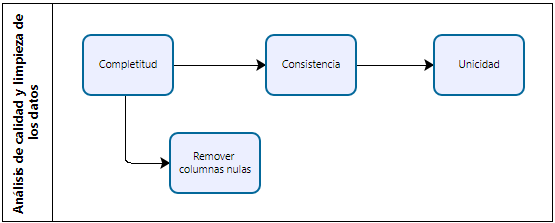

In [20]:
# Diagrama de bloques análisis de calidad y limpieza de los datos
Image(filename=r'C:\Users\lperd\OneDrive - Universidad de los andes\MINE 2024-2\CIENCIA DE DATOS APLICADA\Examen\Análisis de calidad y limpieza de datos.png')

##### 3.1 Completitud

In [21]:
# Verificar los valores faltantes por columna
valores_nulos_celulares = celulares_df.isnull().sum()
porcentaje_nulos_celulares = (valores_nulos_celulares/len(celulares_df))*100

completitud_celulares = pd.DataFrame({
    'Valores nulos': valores_nulos_celulares,
    'Porcentaje nulos': porcentaje_nulos_celulares
})
print(completitud_celulares.sort_values(by='Porcentaje nulos', ascending=False))


                                  Valores nulos  Porcentaje nulos
seller_contact                              984        100.000000
video_id                                    984        100.000000
original_price                              977         99.288618
parent_item_id                              974         98.983740
official_store_id                           899         91.361789
health                                      401         40.752033
catalog_product_id                          386         39.227642
warranty                                      5          0.508130
status                                        0          0.000000
location                                      0          0.000000
coverage_areas                                0          0.000000
attributes                                    0          0.000000
listing_source                                0          0.000000
variations                                    0          0.000000
id        

In [22]:
valores_nulos_caracteristicas = caracteristicas_df.isnull().sum()
porcentaje_nulos_caracteristicas = (valores_nulos_caracteristicas/len(caracteristicas_df))*100

completitud_caracteristicas = pd.DataFrame({
    'Valores nulos': valores_nulos_caracteristicas,
    'Porcentaje nulos': porcentaje_nulos_caracteristicas
})
print(completitud_caracteristicas.sort_values(by='Porcentaje nulos', ascending=False))

                      Valores nulos  Porcentaje nulos
discounts                       984        100.000000
winner_item_id                  984        100.000000
inventory_id                    938         95.325203
official_store_name             899         91.361789
official_store_id               899         91.361789
differential_pricing            753         76.524390
original_price                  707         71.849593
variations_data                 409         41.565041
variation_filters               409         41.565041
catalog_product_id              386         39.227642
stop_time                         0          0.000000
accepts_mercadopago               0          0.000000
shipping                          0          0.000000
catalog_listing                   0          0.000000
seller                            0          0.000000
attributes                        0          0.000000
installments                      0          0.000000
promotions                  

In [23]:
valores_nulos_vendedores = vendedores_df.isnull().sum()
porcentaje_nulos_vendedores = (valores_nulos_vendedores/len(vendedores_df))*100

completitud_vendedores = pd.DataFrame({
    'Valores nulos': valores_nulos_vendedores,
    'Porcentaje nulos': porcentaje_nulos_vendedores
})
print(completitud_vendedores.sort_values(by='Porcentaje nulos', ascending=False))

                   Valores nulos  Porcentaje nulos
id                             0               0.0
nickname                       0               0.0
country_id                     0               0.0
address                        0               0.0
user_type                      0               0.0
site_id                        0               0.0
permalink                      0               0.0
seller_reputation              0               0.0
status                         0               0.0


##### 3.2 Consistencia

In [24]:
#Validar los tipos de datos
celulares_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                984 non-null    object 
 1   site_id                           984 non-null    object 
 2   title                             984 non-null    object 
 3   seller_id                         984 non-null    int64  
 4   category_id                       984 non-null    object 
 5   official_store_id                 85 non-null     float64
 6   price                             984 non-null    int64  
 7   base_price                        984 non-null    int64  
 8   original_price                    7 non-null      float64
 9   currency_id                       984 non-null    object 
 10  initial_quantity                  984 non-null    int64  
 11  sale_terms                        984 non-null    object 
 12  buying_m

In [25]:
caracteristicas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    984 non-null    object 
 1   title                 984 non-null    object 
 2   condition             984 non-null    object 
 3   thumbnail_id          984 non-null    object 
 4   catalog_product_id    598 non-null    object 
 5   listing_type_id       984 non-null    object 
 6   sanitized_title       984 non-null    object 
 7   permalink             984 non-null    object 
 8   buying_mode           984 non-null    object 
 9   site_id               984 non-null    object 
 10  category_id           984 non-null    object 
 11  domain_id             984 non-null    object 
 12  thumbnail             984 non-null    object 
 13  currency_id           984 non-null    object 
 14  order_backend         984 non-null    int64  
 15  price                 9

In [26]:
vendedores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 212 non-null    int64 
 1   nickname           212 non-null    object
 2   country_id         212 non-null    object
 3   address            212 non-null    object
 4   user_type          212 non-null    object
 5   site_id            212 non-null    object
 6   permalink          212 non-null    object
 7   seller_reputation  212 non-null    object
 8   status             212 non-null    object
dtypes: int64(1), object(8)
memory usage: 15.0+ KB


##### 3.3 Unicidad

In [27]:
if celulares_df['id'].is_unique:
    print("Columna 'id' en 'Celulares' no contiene duplicados")
else:
    print("Hay duplicados en la columna 'id'")

Columna 'id' en 'Celulares' no contiene duplicados


In [28]:
if caracteristicas_df['id'].is_unique:
    print("Columna 'id' en 'Características' no contiene duplicados")
else:
    print("Hay duplicados en la columna 'id'")

Columna 'id' en 'Características' no contiene duplicados


In [29]:
if vendedores_df['id'].is_unique:
    print("Columna 'id' en 'Vendedores' no contiene duplicados")
else:
    print("Hay duplicados en la columna 'id'")

Columna 'id' en 'Vendedores' no contiene duplicados


#### Limieza de los datos

In [30]:
#Remover columnas con más del 95% de los datos nulos
celulares_df = celulares_df.drop(columns=["seller_contact", "video_id", "original_price", "parent_item_id"])
celulares_df.shape

(984, 41)

In [31]:
caracteristicas_df = caracteristicas_df.drop(columns=["discounts", "winner_item_id", "inventory_id"])
caracteristicas_df.shape

(984, 33)

### 4. Análisis Univariado

Las cinco variables más relevantes para el análisis son: 

1. Precio y forma de pago
2. Tipo de envío
3. Ubicación del vendedor
4. Reputación del vendedor
5. Garantía del vendedor

Otras características (marca, color, tamaño de pantalla, resolución de las cámaras, capacidad de la batería, capacidad de almacenamiento, etc.)

#### 4.1 Precio

In [32]:
mean_price = celulares_df['price'].mean(skipna=True)
print(mean_price)

1516229.074186992


In [33]:
variance_price = celulares_df['price'].var(skipna=True)
print(variance_price)

4220287535231.452


In [34]:
std_dev_price = celulares_df['price'].std(skipna=True)
print(std_dev_price)

2054333.8422056558


In [35]:
celulares_df["price"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    9.840000e+02
mean     1.516229e+06
std      2.054334e+06
min      4.532700e+04
5%       1.232850e+05
25%      3.696500e+05
50%      7.999000e+05
75%      1.703179e+06
95%      5.489587e+06
max      1.919700e+07
Name: price, dtype: float64

In [36]:
q1 = celulares_df["price"].quantile(0.25)
q3 = celulares_df["price"].quantile(0.75)
iqr = q3 - q1

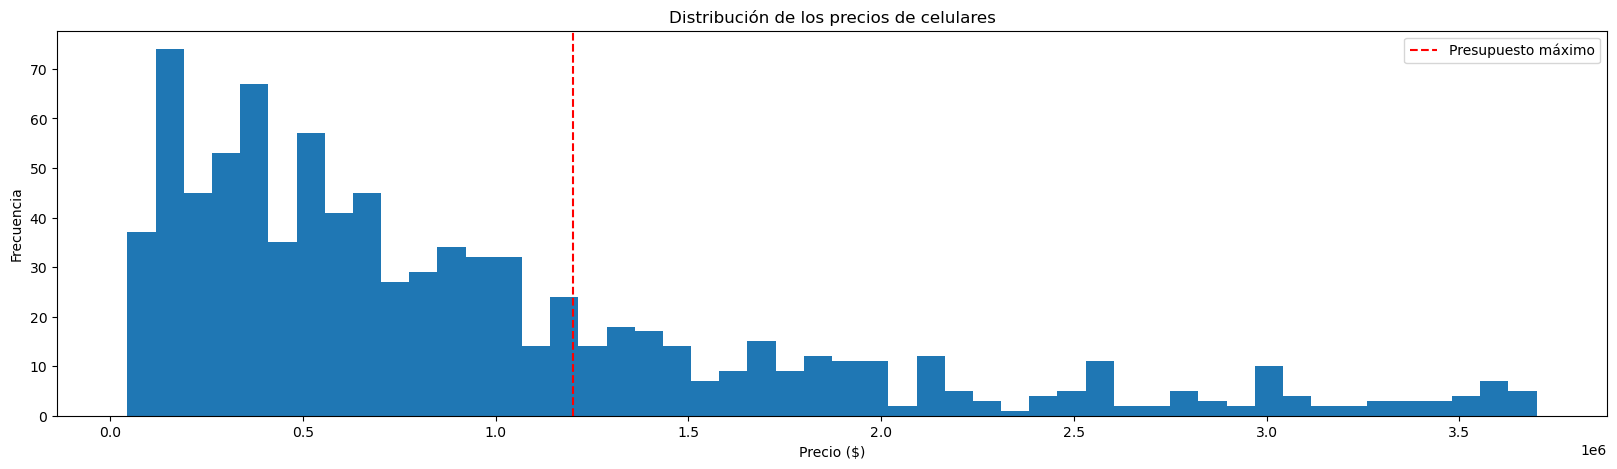

In [37]:
plt.figure(figsize=(20, 5))
plt.hist(celulares_df.loc[celulares_df["price"] <= (q3 + 1.5 * iqr)]["price"], bins=50)
plt.axvline(1200000, color='red', linestyle='--', label='Presupuesto máximo')
plt.title('Distribución de los precios de celulares')
plt.xlabel('Precio ($)')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

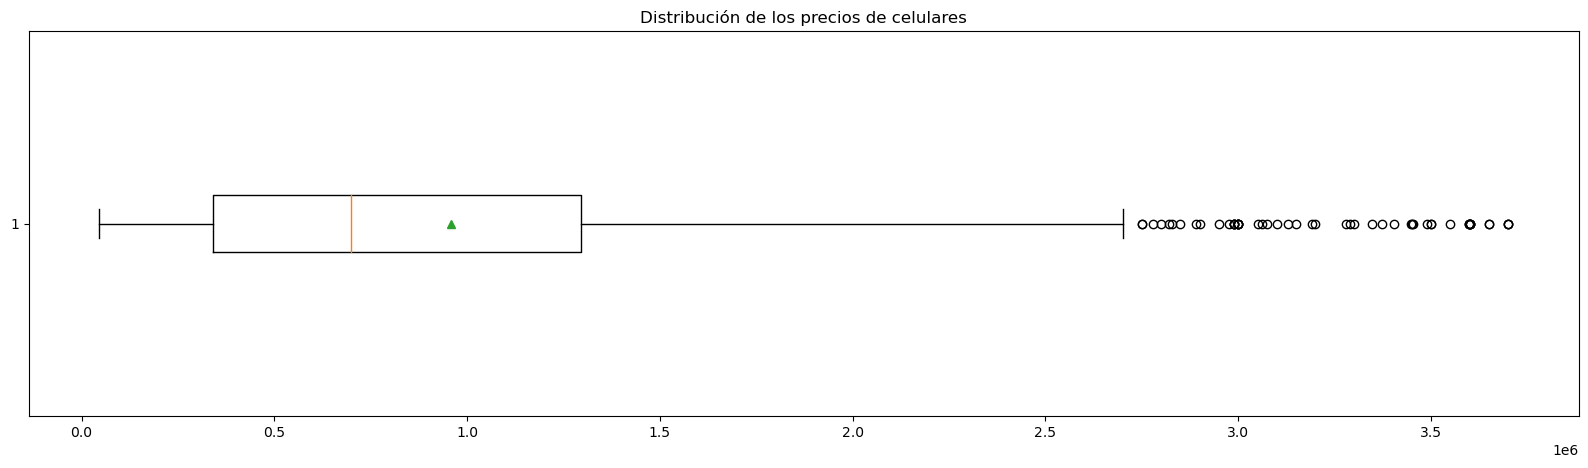

In [38]:
plt.figure(figsize=(20, 5))
plt.boxplot(celulares_df.loc[celulares_df["price"] <= (q3 + 1.5 * iqr)]["price"], showmeans=True, vert=False)
plt.title("Distribución de los precios de celulares")
plt.show()

##### Forma de Pago

In [39]:
# Función para extraer el valor de 'quantity' del diccionario en 'installments'
def obtener_installments(installments):
    if isinstance(installments, dict):
        return installments.get('quantity', 'No especificado')
    return 'No especificado'

# Aplicar la función a la columna 'installments' para extraer el tipo de método de pago
caracteristicas_df['quantity'] = caracteristicas_df['installments'].apply(obtener_installments)

# Verificar los primeros registros con la nueva columna
print(caracteristicas_df[['installments', 'quantity']].head())

                                        installments  quantity
0  {'quantity': 36, 'amount': 17192, 'rate': 0, '...        36
1  {'quantity': 12, 'amount': 129450, 'rate': 0, ...        12
2  {'quantity': 36, 'amount': 38775, 'rate': 0, '...        36
3  {'quantity': 36, 'amount': 12136, 'rate': 0, '...        36
4  {'quantity': 36, 'amount': 95998, 'rate': 0, '...        36


In [40]:
#Frecuencia absoluta
caracteristicas_df["quantity"].value_counts(dropna=False, normalize=False)

quantity
36    753
12    231
Name: count, dtype: int64

In [41]:
#Frecuencia relativa
caracteristicas_df["quantity"].value_counts(dropna=False, normalize=True)

quantity
36    0.765244
12    0.234756
Name: proportion, dtype: float64

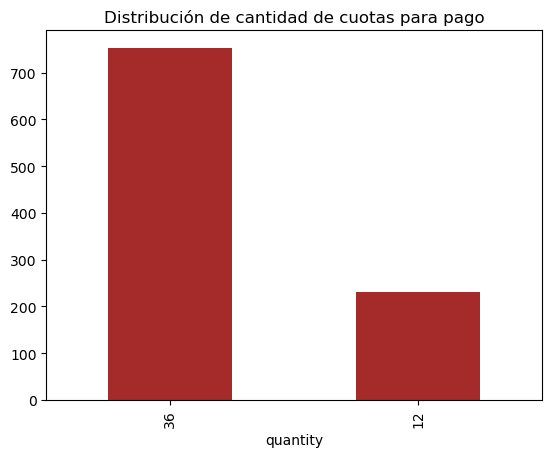

In [42]:
caracteristicas_df["quantity"].value_counts().plot(kind="bar", color="brown")
plt.title("Distribución de cantidad de cuotas para pago")

plt.show()

#### 4.2 Tipo de Envío

In [43]:
# Extraer la información de 'free_shipping' en una nueva columna
caracteristicas_df['envio_gratis'] = caracteristicas_df['shipping'].apply(lambda x: x.get('free_shipping', False))

# Verificar los primeros registros
print(caracteristicas_df[['shipping', 'envio_gratis']].head())

                                            shipping  envio_gratis
0  {'store_pick_up': False, 'free_shipping': True...          True
1  {'store_pick_up': False, 'free_shipping': True...          True
2  {'store_pick_up': False, 'free_shipping': True...          True
3  {'store_pick_up': False, 'free_shipping': True...          True
4  {'store_pick_up': False, 'free_shipping': True...          True


In [44]:
#Frecuencia relativa
caracteristicas_df["envio_gratis"].value_counts(dropna=False, normalize=True)

envio_gratis
True     0.993902
False    0.006098
Name: proportion, dtype: float64

In [45]:
#Frecuencia absoluta
caracteristicas_df["envio_gratis"].value_counts(dropna=False, normalize=False)

envio_gratis
True     978
False      6
Name: count, dtype: int64

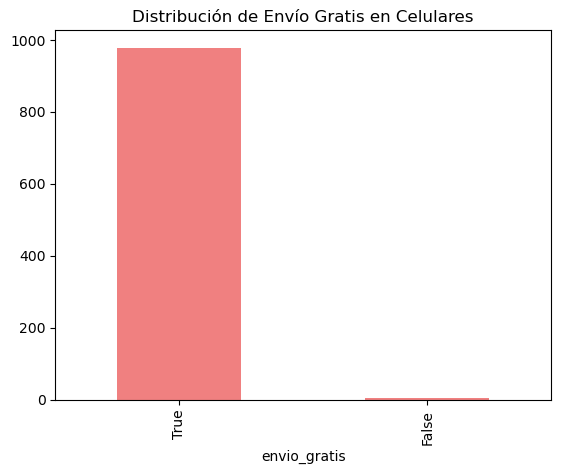

In [46]:
caracteristicas_df["envio_gratis"].value_counts().plot(kind="bar", color="lightcoral")
plt.title("Distribución de Envío Gratis en Celulares")

plt.show()

### 4.3 Ubicación del vendedor

In [47]:
# Extraer el valor de 'state' en una nueva columna
vendedores_df['state'] = vendedores_df['address'].apply(lambda x: x.get('state') if isinstance(x, dict) else None)

# Verificar los primeros registros
print(vendedores_df[['address', 'state']].head())

                                   address   state
0    {'city': 'Usaquén', 'state': 'CO-DC'}   CO-DC
1       {'city': 'Suba', 'state': 'CO-DC'}   CO-DC
2  {'city': 'Medellín', 'state': 'CO-ANT'}  CO-ANT
3   {'city': 'Pereira', 'state': 'CO-RIS'}  CO-RIS
4       {'city': 'Suba', 'state': 'CO-DC'}   CO-DC


In [48]:
# Obtener todos los tipos de 'state' únicos
colombia = vendedores_df['state'].unique()

# Mostrar los tipos únicos de 'state'
print(colombia)

['CO-DC' 'CO-ANT' 'CO-RIS' 'CN-ZJ' 'CN-GD' 'CN-HI' 'CO-HUI' 'CN-HN'
 'CN-SH' 'CO-CUN' 'CO-ATL' 'CN-HB' 'CO-SAN' 'CO-QUI' 'CO-VAC' 'CN-SD'
 'CO-COR' 'CN-SN' 'CN-HA' 'CO-CAS' 'CN-JX' 'CN-HE' 'HK-HK' 'CN-FJ'
 'CO-SUC' 'CO-TOL' 'CO-CES']


In [49]:
#Frecuencia relativa
vendedores_df["state"].value_counts(dropna=False, normalize=True)

state
CO-DC     0.495283
CN-GD     0.122642
CO-CUN    0.075472
CO-ANT    0.075472
CN-ZJ     0.023585
CO-SAN    0.023585
CO-ATL    0.018868
CN-HN     0.014151
CN-HB     0.014151
CO-VAC    0.014151
CN-SD     0.009434
CN-FJ     0.009434
CN-HE     0.009434
CN-HA     0.009434
CO-COR    0.009434
CO-CES    0.009434
CN-SH     0.009434
CN-HI     0.009434
CO-RIS    0.009434
CN-SN     0.004717
CO-HUI    0.004717
CO-CAS    0.004717
CN-JX     0.004717
HK-HK     0.004717
CO-SUC    0.004717
CO-TOL    0.004717
CO-QUI    0.004717
Name: proportion, dtype: float64

In [50]:
#Frecuencia absoluta
vendedores_df["state"].value_counts(dropna=False, normalize=False)

state
CO-DC     105
CN-GD      26
CO-CUN     16
CO-ANT     16
CN-ZJ       5
CO-SAN      5
CO-ATL      4
CN-HN       3
CN-HB       3
CO-VAC      3
CN-SD       2
CN-FJ       2
CN-HE       2
CN-HA       2
CO-COR      2
CO-CES      2
CN-SH       2
CN-HI       2
CO-RIS      2
CN-SN       1
CO-HUI      1
CO-CAS      1
CN-JX       1
HK-HK       1
CO-SUC      1
CO-TOL      1
CO-QUI      1
Name: count, dtype: int64

In [51]:
registros_co_DC = vendedores_df[vendedores_df['state'] == 'CO-DC']

print(registros_co_DC[['address']])

                                          address
0           {'city': 'Usaquén', 'state': 'CO-DC'}
1              {'city': 'Suba', 'state': 'CO-DC'}
4              {'city': 'Suba', 'state': 'CO-DC'}
6          {'city': 'Fontibón', 'state': 'CO-DC'}
9          {'city': 'Martires', 'state': 'CO-DC'}
..                                            ...
204         {'city': 'Kennedy', 'state': 'CO-DC'}
205  {'city': 'Barrios Unidos', 'state': 'CO-DC'}
206   {'city': 'Puente Aranda', 'state': 'CO-DC'}
207            {'city': 'Bosa', 'state': 'CO-DC'}
208            {'city': 'Suba', 'state': 'CO-DC'}

[105 rows x 1 columns]


In [52]:
registros_co_cun = vendedores_df[vendedores_df['state'] == 'CO-CUN']

print(registros_co_cun[['address']])

                                      address
21   {'city': 'Zipaquirá', 'state': 'CO-CUN'}
25        {'city': 'Cota', 'state': 'CO-CUN'}
28        {'city': 'Cota', 'state': 'CO-CUN'}
41        {'city': 'Cota', 'state': 'CO-CUN'}
58        {'city': 'Cota', 'state': 'CO-CUN'}
106       {'city': 'Cota', 'state': 'CO-CUN'}
111       {'city': 'Cota', 'state': 'CO-CUN'}
118       {'city': 'Cota', 'state': 'CO-CUN'}
134      {'city': 'Funza', 'state': 'CO-CUN'}
157      {'city': 'Tenjo', 'state': 'CO-CUN'}
167     {'city': 'Madrid', 'state': 'CO-CUN'}
169       {'city': 'Cota', 'state': 'CO-CUN'}
171       {'city': 'Cota', 'state': 'CO-CUN'}
175       {'city': 'Cota', 'state': 'CO-CUN'}
185      {'city': 'Tenjo', 'state': 'CO-CUN'}
192      {'city': 'Tenjo', 'state': 'CO-CUN'}


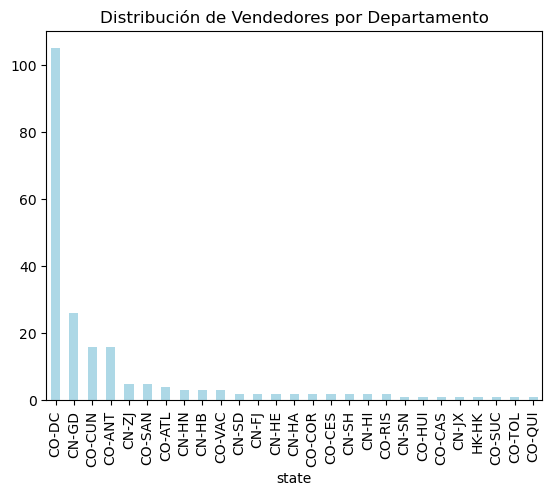

In [53]:
vendedores_df["state"].value_counts().plot(kind="bar", color="lightblue")
plt.title("Distribución de Vendedores por Departamento")

plt.show()

### 4.4 Reputación del vendedor

In [54]:
# Extraer el valor de 'level_id' en una nueva columna
vendedores_df['level_id'] = vendedores_df['seller_reputation'].apply(lambda x: x.get('level_id') if isinstance(x, dict) else None)

# Verificar los primeros registros
print(vendedores_df[['seller_reputation', 'level_id']].head())

                                   seller_reputation level_id
0  {'level_id': '5_green', 'power_seller_status':...  5_green
1  {'level_id': '5_green', 'power_seller_status':...  5_green
2  {'level_id': '5_green', 'power_seller_status':...  5_green
3  {'level_id': '5_green', 'power_seller_status':...  5_green
4  {'level_id': '5_green', 'power_seller_status':...  5_green


In [55]:
# Extraer el valor numérico de 'level_id' en una nueva columna
vendedores_df['level_id_num'] = vendedores_df['level_id'].apply(lambda x: re.search(r'\d+', x).group() if isinstance(x, str) and re.search(r'\d+', x) else None)

# Verificar los primeros registros
print(vendedores_df[['level_id', 'level_id_num']].head())

  level_id level_id_num
0  5_green            5
1  5_green            5
2  5_green            5
3  5_green            5
4  5_green            5


In [56]:
# Convertir la columna 'level_id_num' a tipo numérico
vendedores_df['level_id_num'] = pd.to_numeric(vendedores_df['level_id_num'], errors='coerce')

# Verificar los primeros registros
print(vendedores_df[['level_id', 'level_id_num']].head())

# Verificar el tipo de dato
print(vendedores_df['level_id_num'].dtype)

  level_id  level_id_num
0  5_green           5.0
1  5_green           5.0
2  5_green           5.0
3  5_green           5.0
4  5_green           5.0
float64


In [57]:
#Frecuencia relativa
vendedores_df["level_id_num"].value_counts(dropna=False, normalize=True)

level_id_num
5.0    0.867925
4.0    0.080189
3.0    0.033019
NaN    0.018868
Name: proportion, dtype: float64

In [58]:
# Extraer el valor de 'power_seller_status' en una nueva columna
vendedores_df['power_seller_status'] = vendedores_df['seller_reputation'].apply(lambda x: x.get('power_seller_status') if isinstance(x, dict) else None)

# Verificar los primeros registros
print(vendedores_df[['seller_reputation', 'power_seller_status']].head())

                                   seller_reputation power_seller_status
0  {'level_id': '5_green', 'power_seller_status':...                None
1  {'level_id': '5_green', 'power_seller_status':...              silver
2  {'level_id': '5_green', 'power_seller_status':...              silver
3  {'level_id': '5_green', 'power_seller_status':...            platinum
4  {'level_id': '5_green', 'power_seller_status':...                gold


In [59]:
#Valores únicos de power_seller_status
vendedores_df["power_seller_status"].unique()

array([None, 'silver', 'platinum', 'gold'], dtype=object)

In [60]:
#Frecuencia relativa
vendedores_df["power_seller_status"].value_counts(dropna=False, normalize=True)

power_seller_status
None        0.632075
platinum    0.141509
silver      0.122642
gold        0.103774
Name: proportion, dtype: float64

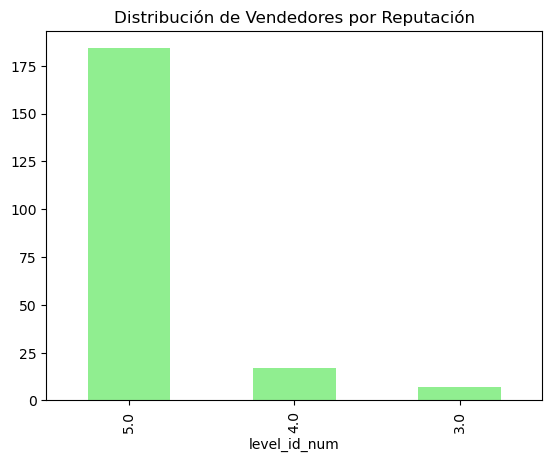

In [61]:
vendedores_df["level_id_num"].value_counts().plot(kind="bar", color="lightgreen")
plt.title("Distribución de Vendedores por Reputación")

plt.show()

power_seller_status  gold  platinum  silver
level_id_num                               
5.0                    22        30      26


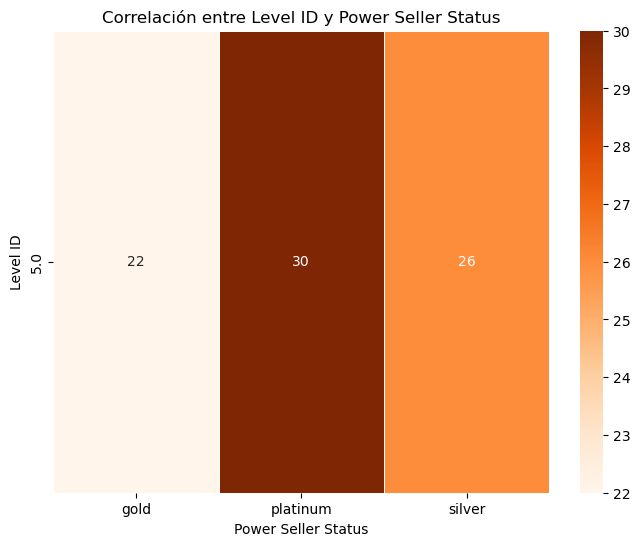

In [62]:
# Crear la tabla de contingencia entre 'level_id_num' y 'power_seller_status'
tabla_contingencia = pd.crosstab(vendedores_df['level_id_num'], vendedores_df['power_seller_status'])

# Mostrar la tabla de contingencia para verificar los datos
print(tabla_contingencia)

# Crear un gráfico de calor (heatmap) para visualizar la correlación
plt.figure(figsize=(8, 6))
sns.heatmap(tabla_contingencia, annot=True, fmt='d', cmap='Oranges', linewidths=0.5)

# Títulos del gráfico
plt.title('Correlación entre Level ID y Power Seller Status')
plt.ylabel('Level ID')
plt.xlabel('Power Seller Status')

# Mostrar el gráfico
plt.show()

### 4.5 Garantía

In [63]:
# Función para extraer la garantía del vendedor en meses
def extraer_garantia_vendedor(warranty_text):
    # Comprobar si el texto no es None
    if warranty_text and isinstance(warranty_text, str):
        # Buscar la parte de "Garantía del vendedor"
        match = re.search(r'Garantía del vendedor: (\d+) (días|meses)', warranty_text)
        
        if match:
            cantidad = int(match.group(1))
            unidad = match.group(2)
            
            # Si es en días, convertirlo a meses (aproximadamente 30 días en un mes)
            if unidad == 'días':
                cantidad = cantidad / 30  # Aproximación de conversión de días a meses
            
            return cantidad  # Retornar el valor en meses
    
    return 0  # Retornar 0 si no se encuentra información o si el texto es None

# Aplicar la función a la columna 'warranty' para extraer la garantía en meses
celulares_df['garantia_vendedor_meses'] = celulares_df['warranty'].apply(extraer_garantia_vendedor)

# Verificar los primeros registros con la nueva columna
print(celulares_df[['warranty', 'garantia_vendedor_meses']].head())

                         warranty  garantia_vendedor_meses
0  Garantía del vendedor: 60 días                      2.0
1  Garantía del vendedor: 3 meses                      3.0
2   Garantía de fábrica: 12 meses                      0.0
3   Garantía de fábrica: 12 meses                      0.0
4   Garantía de fábrica: 12 meses                      0.0


In [64]:
celulares_df['garantia_vendedor_meses'].dtype

dtype('float64')

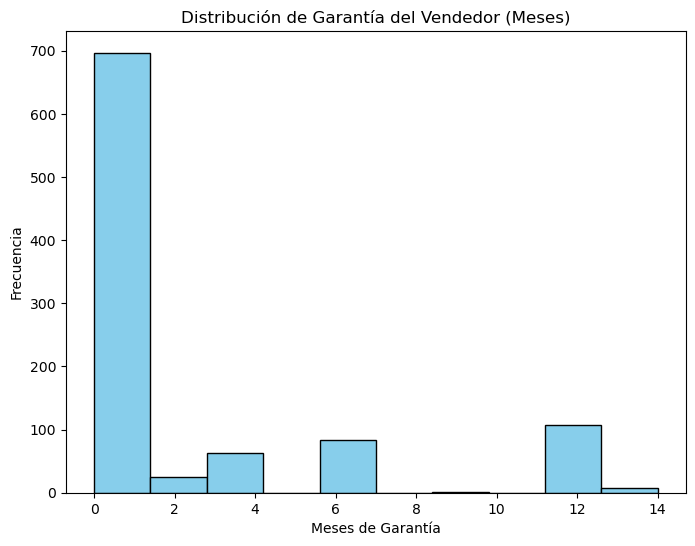

In [65]:
# Crear el histograma
plt.figure(figsize=(8, 6))
plt.hist(celulares_df['garantia_vendedor_meses'], bins=10, color='skyblue', edgecolor='black')

# Etiquetas
plt.title('Distribución de Garantía del Vendedor (Meses)')
plt.xlabel('Meses de Garantía')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

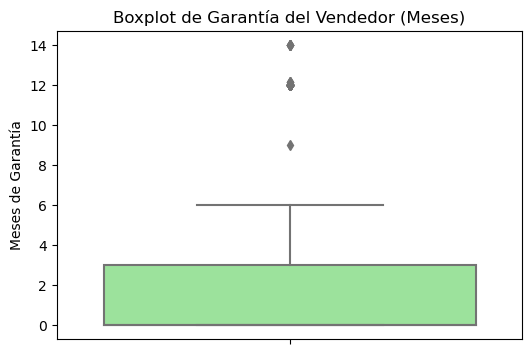

In [66]:
# Crear un gráfico de cajas
plt.figure(figsize=(6, 4))
sns.boxplot(y=celulares_df['garantia_vendedor_meses'], color='lightgreen')

# Etiquetas
plt.title('Boxplot de Garantía del Vendedor (Meses)')
plt.ylabel('Meses de Garantía')

# Mostrar el gráfico
plt.show()

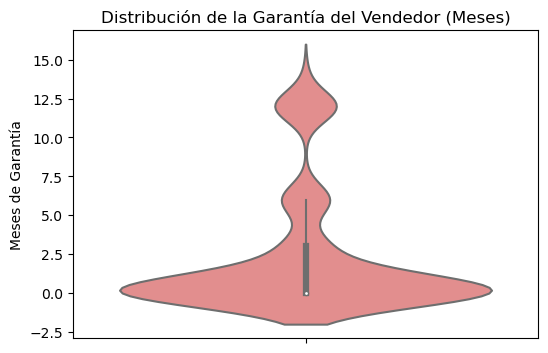

In [67]:
# Crear un gráfico de violín
plt.figure(figsize=(6, 4))
sns.violinplot(y=celulares_df['garantia_vendedor_meses'], color='lightcoral')

# Etiquetas
plt.title('Distribución de la Garantía del Vendedor (Meses)')
plt.ylabel('Meses de Garantía')

# Mostrar el gráfico
plt.show()

### 4.6 Otras Características

##### Condición

In [68]:
#Valores únicos de condición
celulares_df["condition"].unique()

array(['new', 'used'], dtype=object)

In [69]:
#Frecuencia relativa
celulares_df["condition"].value_counts(dropna=False, normalize=True)

condition
new     0.982724
used    0.017276
Name: proportion, dtype: float64

In [70]:
#Frecuencia absoluta
celulares_df["condition"].value_counts(dropna=False, normalize=False)

condition
new     967
used     17
Name: count, dtype: int64

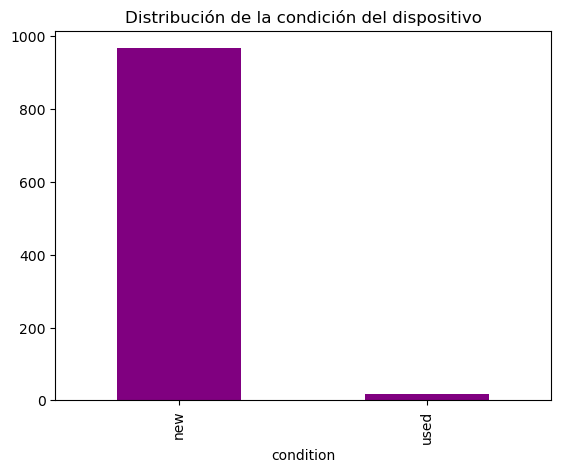

In [71]:
celulares_df["condition"].value_counts().plot(kind="bar", color="purple")
plt.title("Distribución de la condición del dispositivo")

plt.show()

#### Marca

In [72]:
# Función para extraer la marca del diccionario con 'id' igual a 'BRAND'
def extraer_marca(attributes):
    if isinstance(attributes, list):  # Verificar si 'attributes' es una lista
        for attribute in attributes:
            if attribute.get('id') == 'BRAND':  # Buscar el diccionario con 'id' igual a 'BRAND'
                return attribute.get('value_name', 'No especificado')  # Extraer el valor de 'value_name'
    return 'No especificado'  # Devolver 'No especificado' si no se encuentra

# Aplicar la función para crear una nueva columna 'marca'
caracteristicas_df['marca'] = caracteristicas_df['attributes'].apply(extraer_marca)

# Mostrar las primeras filas con la columna 'marca' extraída
print(caracteristicas_df[['attributes', 'marca']].head())

                                          attributes    marca
0  [{'id': 'BRAND', 'name': 'Marca', 'value_id': ...   Xiaomi
1  [{'id': 'BRAND', 'name': 'Marca', 'value_id': ...   Xiaomi
2  [{'id': 'BRAND', 'name': 'Marca', 'value_id': ...  Samsung
3  [{'id': 'BRAND', 'name': 'Marca', 'value_id': ...   Xiaomi
4  [{'id': 'BRAND', 'name': 'Marca', 'value_id': ...  Samsung


In [73]:
#Frecuencia relativa
caracteristicas_df["marca"].value_counts(dropna=False, normalize=True)

marca
Xiaomi                                                                                                                 0.154472
Samsung                                                                                                                0.130081
Motorola                                                                                                               0.098577
Apple                                                                                                                  0.072154
Tecno                                                                                                                  0.063008
Generic                                                                                                                0.047764
ZTE                                                                                                                    0.041667
Infinix                                                                                           

In [74]:
#Frecuencia absoluta
caracteristicas_df["marca"].value_counts(dropna=False, normalize=False)

marca
Xiaomi                                                                                                                 152
Samsung                                                                                                                128
Motorola                                                                                                                97
Apple                                                                                                                   71
Tecno                                                                                                                   62
Generic                                                                                                                 47
ZTE                                                                                                                     41
Infinix                                                                                                                 32
Oppo      

In [75]:
caracteristicas_df['marca'].nunique()

80

In [76]:
marcas_frecuentes = caracteristicas_df["marca"].value_counts(normalize=True).cumsum()

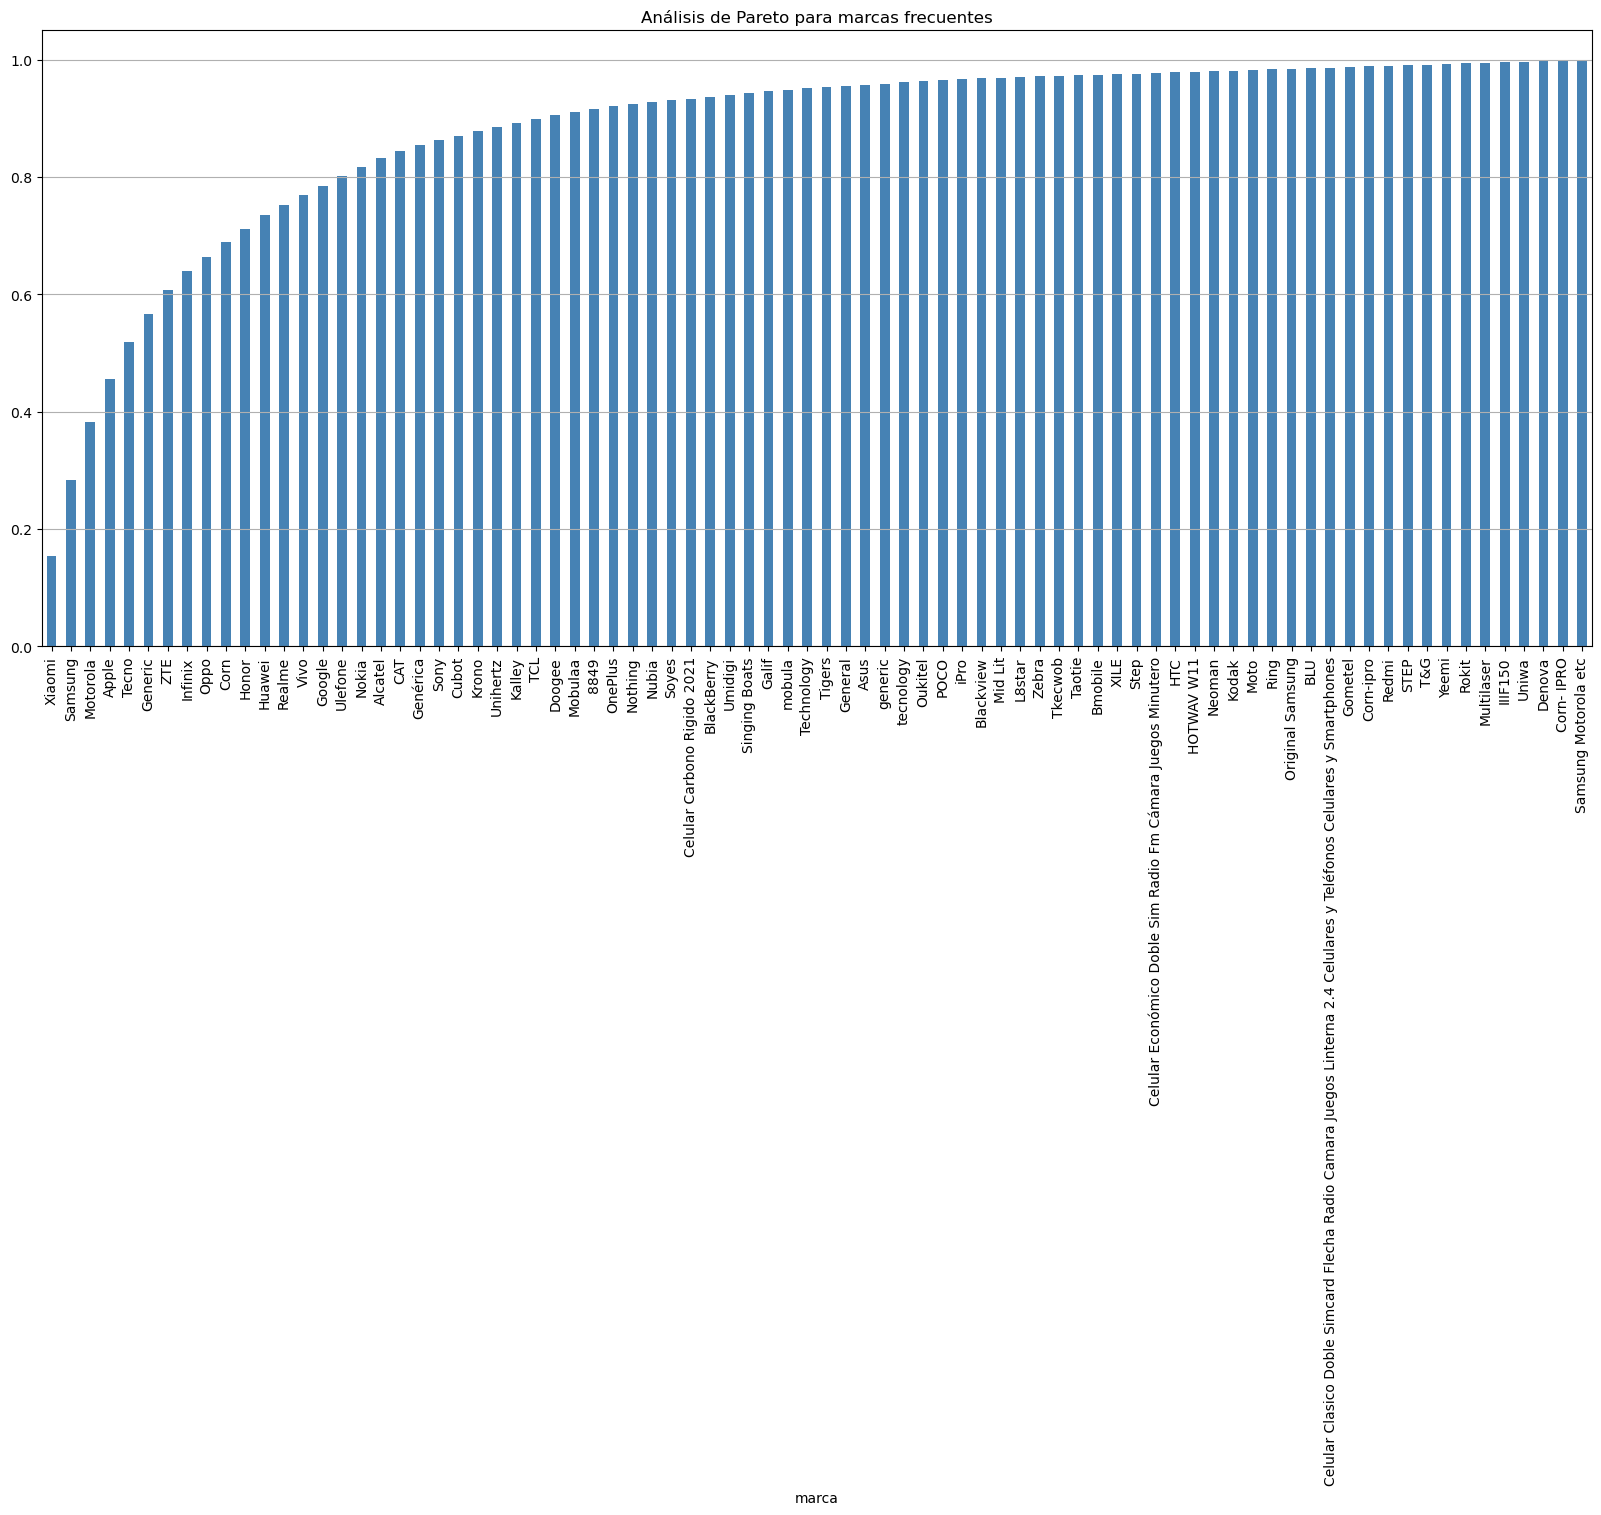

In [77]:
plt.figure(figsize=(20, 8))
marcas_frecuentes.plot(kind="bar", color="steelblue")
plt.title("Análisis de Pareto para marcas frecuentes")
plt.grid(axis="y")
plt.show()

In [78]:
marcas_representantivas = marcas_frecuentes.loc[marcas_frecuentes < 0.8].index.tolist()
marcas_representantivas

['Xiaomi',
 'Samsung',
 'Motorola',
 'Apple',
 'Tecno',
 'Generic',
 'ZTE',
 'Infinix',
 'Oppo',
 'Corn',
 'Honor',
 'Huawei',
 'Realme',
 'Vivo',
 'Google']

#### Color

In [79]:
# Función para extraer la marca del diccionario con 'id' igual a 'MAIN_COLOR'
def extraer_color(attributes):
    if isinstance(attributes, list):  # Verificar si 'attributes' es una lista
        for attribute in attributes:
            if attribute.get('id') == 'MAIN_COLOR':  # Buscar el diccionario con 'id' igual a 'MAIN_COLOR'
                return attribute.get('value_name', 'No especificado')  # Extraer el valor de 'value_name'
    return 'No especificado'  # Devolver 'No especificado' si no se encuentra

# Aplicar la función para crear una nueva columna 'MAIN_COLOR'
celulares_df['MAIN_COLOR'] = celulares_df['attributes'].apply(extraer_color)

# Mostrar las primeras filas con la columna 'MAIN_COLOR' extraída
print(celulares_df[['attributes', 'MAIN_COLOR']].head())

                                          attributes       MAIN_COLOR
0  [{'id': 'ACCESSORIES_INCLUDED', 'name': 'Acces...  No especificado
1  [{'id': 'ACCESSORIES_INCLUDED', 'name': 'Acces...  No especificado
2  [{'id': 'ACCESSORIES_INCLUDED', 'name': 'Acces...  No especificado
3  [{'id': 'BATTERY_CAPACITY', 'name': 'Capacidad...            Negro
4  [{'id': 'BRAND', 'name': 'Marca', 'value_id': ...  No especificado


In [80]:
#Frecuencia relativa
celulares_df["MAIN_COLOR"].value_counts(dropna=False, normalize=True)

MAIN_COLOR
No especificado    0.604675
Negro              0.177846
Azul               0.059959
Verde              0.030488
Gris               0.023374
Blanco             0.021341
Dorado             0.015244
Violeta            0.012195
Celeste            0.011179
Plateado           0.008130
Crema              0.006098
Gris oscuro        0.003049
Verde claro        0.003049
Azul oscuro        0.003049
Azul claro         0.003049
Verde oscuro       0.002033
Rojo               0.002033
Amarillo           0.002033
Rosa               0.002033
Lila               0.002033
Beige              0.001016
Naranja oscuro     0.001016
Coral              0.001016
Verde limón        0.001016
Naranja            0.001016
Coral oscuro       0.001016
Naranja claro      0.001016
Name: proportion, dtype: float64

In [81]:
#Frecuencia absoluta
celulares_df["MAIN_COLOR"].value_counts(dropna=False, normalize=False)

MAIN_COLOR
No especificado    595
Negro              175
Azul                59
Verde               30
Gris                23
Blanco              21
Dorado              15
Violeta             12
Celeste             11
Plateado             8
Crema                6
Gris oscuro          3
Verde claro          3
Azul oscuro          3
Azul claro           3
Verde oscuro         2
Rojo                 2
Amarillo             2
Rosa                 2
Lila                 2
Beige                1
Naranja oscuro       1
Coral                1
Verde limón          1
Naranja              1
Coral oscuro         1
Naranja claro        1
Name: count, dtype: int64

#### Tamaño Pantalla

In [82]:
# Función para extraer la marca del diccionario con 'id' igual a 'DISPLAY_SIZE'
def extraer_color(attributes):
    if isinstance(attributes, list):  # Verificar si 'attributes' es una lista
        for attribute in attributes:
            if attribute.get('id') == 'DISPLAY_SIZE':  # Buscar el diccionario con 'id' igual a 'DISPLAY_SIZE'
                return attribute.get('value_name', 'No especificado')  # Extraer el valor de 'value_name'
    return 'No especificado'  # Devolver 'No especificado' si no se encuentra

# Aplicar la función para crear una nueva columna 'DISPLAY_SIZE'
celulares_df['DISPLAY_SIZE'] = celulares_df['attributes'].apply(extraer_color)

# Mostrar las primeras filas con la columna 'DISPLAY_SIZE' extraída
print(celulares_df[['attributes', 'DISPLAY_SIZE']].head())

                                          attributes     DISPLAY_SIZE
0  [{'id': 'ACCESSORIES_INCLUDED', 'name': 'Acces...           0.17 m
1  [{'id': 'ACCESSORIES_INCLUDED', 'name': 'Acces...  No especificado
2  [{'id': 'ACCESSORIES_INCLUDED', 'name': 'Acces...  No especificado
3  [{'id': 'BATTERY_CAPACITY', 'name': 'Capacidad...  No especificado
4  [{'id': 'BRAND', 'name': 'Marca', 'value_id': ...  No especificado


In [83]:
# Función para limpiar y convertir el tamaño de pantalla
def convertir_a_pulgadas(display_size):
    if pd.isnull(display_size):  # Verificar si es nulo
        return display_size
    
    # Remover espacios y convertir a minúsculas para normalizar
    display_size = display_size.strip().lower()
    
    # Manejar el caso de 'No especificado'
    if 'no especificado' in display_size:
        return None
    
    # Si el valor está en pulgadas (contiene el símbolo ")
    if '"' in display_size:
        try:
            return float(re.search(r'(\d+(\.\d+)?)', display_size).group())  # Extraer el valor numérico en pulgadas
        except AttributeError:
            return None  # Si no se puede extraer el número, devuelve None

    # Si el valor está en metros (contiene la letra 'm')
    if 'm' in display_size:
        try:
            # Extraer el valor numérico en metros y convertir a pulgadas
            metros = float(re.search(r'(\d+(\.\d+)?)', display_size).group())
            return metros * 39.3701
        except AttributeError:
            return None  # Si no se puede extraer el número, devuelve None
    
    return None  # Si no cumple ninguna de las condiciones anteriores

# Aplicar la función a la columna 'DISPLAY_SIZE' y crear una nueva columna 'DISPLAY_SIZE_pulgadas'
celulares_df['DISPLAY_SIZE_pulgadas'] = celulares_df['DISPLAY_SIZE'].apply(convertir_a_pulgadas)

# Mostrar las primeras filas para verificar la conversión
print(celulares_df[['DISPLAY_SIZE', 'DISPLAY_SIZE_pulgadas']].head())

      DISPLAY_SIZE  DISPLAY_SIZE_pulgadas
0           0.17 m               6.692917
1  No especificado                    NaN
2  No especificado                    NaN
3  No especificado                    NaN
4  No especificado                    NaN


In [84]:
#Frecuencia absoluta
celulares_df["DISPLAY_SIZE_pulgadas"].value_counts(dropna=False, normalize=False)

DISPLAY_SIZE_pulgadas
NaN           285
6.500000       86
6.670000       67
6.700000       62
6.600000       53
6.800000       38
6.100000       38
6.780000       34
6.560000       20
6.400000       17
5.000000       16
2.400000       16
6.614177       15
6.550000       14
6.740000       13
5.500000       12
6.430000       10
6.000000       10
6.790000        9
6.580000        9
4.700000        7
6.710000        7
5.800000        6
1.800000        6
6.900000        6
6.720000        6
6.200000        5
1.770000        5
6.771657        5
6.530000        5
6.520000        4
1.811025        4
6.583000        4
5.400000        3
6.574807        3
6.810000        3
6.496067        3
6.692917        3
6.535437        3
6.730000        3
5.700000        3
6.510000        3
5.450000        3
1.470000        3
6.360000        2
4.000000        2
5.000003        2
6.102366        2
6.470000        2
5.200000        2
3.000000        2
6.820000        2
5.984255        2
6.088000        2
5.8267

In [85]:
#Frecuencia relativa
celulares_df["DISPLAY_SIZE_pulgadas"].value_counts(dropna=False, normalize=True)

DISPLAY_SIZE_pulgadas
NaN           0.289634
6.500000      0.087398
6.670000      0.068089
6.700000      0.063008
6.600000      0.053862
6.800000      0.038618
6.100000      0.038618
6.780000      0.034553
6.560000      0.020325
6.400000      0.017276
5.000000      0.016260
2.400000      0.016260
6.614177      0.015244
6.550000      0.014228
6.740000      0.013211
5.500000      0.012195
6.430000      0.010163
6.000000      0.010163
6.790000      0.009146
6.580000      0.009146
4.700000      0.007114
6.710000      0.007114
5.800000      0.006098
1.800000      0.006098
6.900000      0.006098
6.720000      0.006098
6.200000      0.005081
1.770000      0.005081
6.771657      0.005081
6.530000      0.005081
6.520000      0.004065
1.811025      0.004065
6.583000      0.004065
5.400000      0.003049
6.574807      0.003049
6.810000      0.003049
6.496067      0.003049
6.692917      0.003049
6.535437      0.003049
6.730000      0.003049
5.700000      0.003049
6.510000      0.003049
5.450000    

#### Resolución Cámara Trasera

In [86]:
# Función para extraer la marca del diccionario con 'id' igual a 'MAIN_REAR_CAMERA_RESOLUTION'
def extraer_color(attributes):
    if isinstance(attributes, list):  # Verificar si 'attributes' es una lista
        for attribute in attributes:
            if attribute.get('id') == 'MAIN_REAR_CAMERA_RESOLUTION':  # Buscar el diccionario con 'id' igual a 'MAIN_REAR_CAMERA_RESOLUTION'
                return attribute.get('value_name', 'No especificado')  # Extraer el valor de 'value_name'
    return 'No especificado'  # Devolver 'No especificado' si no se encuentra

# Aplicar la función para crear una nueva columna 'MAIN_REAR_CAMERA_RESOLUTION'
celulares_df['MAIN_REAR_CAMERA_RESOLUTION'] = celulares_df['attributes'].apply(extraer_color)

# Mostrar las primeras filas con la columna 'MAIN_REAR_CAMERA_RESOLUTION' extraída
print(celulares_df[['attributes', 'MAIN_REAR_CAMERA_RESOLUTION']].head())

                                          attributes  \
0  [{'id': 'ACCESSORIES_INCLUDED', 'name': 'Acces...   
1  [{'id': 'ACCESSORIES_INCLUDED', 'name': 'Acces...   
2  [{'id': 'ACCESSORIES_INCLUDED', 'name': 'Acces...   
3  [{'id': 'BATTERY_CAPACITY', 'name': 'Capacidad...   
4  [{'id': 'BRAND', 'name': 'Marca', 'value_id': ...   

  MAIN_REAR_CAMERA_RESOLUTION  
0             No especificado  
1             No especificado  
2             No especificado  
3                      50 Mpx  
4             No especificado  


In [87]:
#Frecuencia absoluta
celulares_df["MAIN_REAR_CAMERA_RESOLUTION"].value_counts(dropna=False, normalize=False)

MAIN_REAR_CAMERA_RESOLUTION
No especificado    340
50 Mpx             225
108 Mpx             66
12 Mpx              64
64 Mpx              51
13 Mpx              50
48 Mpx              42
8 Mpx               31
200 Mpx             28
16 Mpx              23
5 Mpx               20
2 Mpx               11
100 Mpx             10
0.3 Mpx              7
0.08 Mpx             3
40 Mpx               2
12.3 Mpx             2
12.2 Mpx             2
90 Mpx               1
20 Mpx               1
None                 1
10852 Mpx            1
3 px                 1
24 Mpx               1
0.8 Mpx              1
Name: count, dtype: int64

In [88]:
#Frecuencia relativa
celulares_df["MAIN_REAR_CAMERA_RESOLUTION"].value_counts(dropna=False, normalize=True)

MAIN_REAR_CAMERA_RESOLUTION
No especificado    0.345528
50 Mpx             0.228659
108 Mpx            0.067073
12 Mpx             0.065041
64 Mpx             0.051829
13 Mpx             0.050813
48 Mpx             0.042683
8 Mpx              0.031504
200 Mpx            0.028455
16 Mpx             0.023374
5 Mpx              0.020325
2 Mpx              0.011179
100 Mpx            0.010163
0.3 Mpx            0.007114
0.08 Mpx           0.003049
40 Mpx             0.002033
12.3 Mpx           0.002033
12.2 Mpx           0.002033
90 Mpx             0.001016
20 Mpx             0.001016
None               0.001016
10852 Mpx          0.001016
3 px               0.001016
24 Mpx             0.001016
0.8 Mpx            0.001016
Name: proportion, dtype: float64

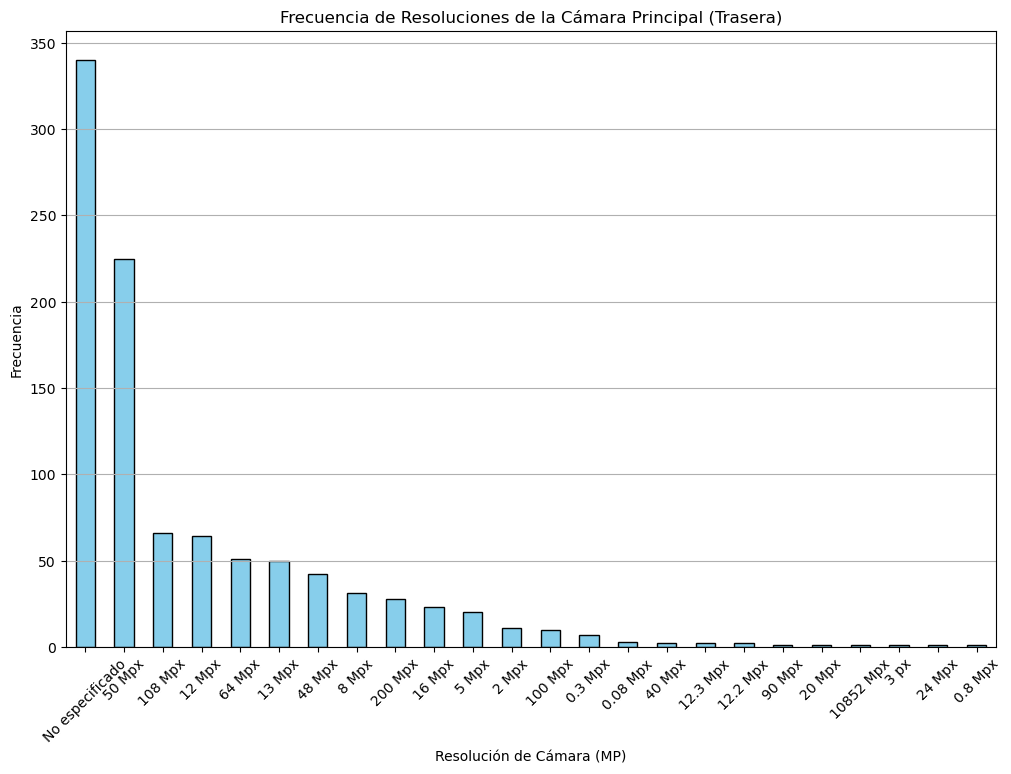

In [89]:
# Contar las ocurrencias de cada valor único en MAIN_REAR_CAMERA_RESOLUTION
conteo_resoluciones = celulares_df['MAIN_REAR_CAMERA_RESOLUTION'].value_counts()

# Crear el diagrama de barras
plt.figure(figsize=(12, 8))
conteo_resoluciones.plot(kind='bar', color='skyblue', edgecolor='black')

# Etiquetas y título
plt.title('Frecuencia de Resoluciones de la Cámara Principal (Trasera)')
plt.xlabel('Resolución de Cámara (MP)')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

#### Resolución Cámara Frontal

In [90]:
# Función para extraer la marca del diccionario con 'id' igual a 'MAIN_FRONT_CAMERA_RESOLUTION'
def extraer_color(attributes):
    if isinstance(attributes, list):  # Verificar si 'attributes' es una lista
        for attribute in attributes:
            if attribute.get('id') == 'MAIN_FRONT_CAMERA_RESOLUTION':  # Buscar el diccionario con 'id' igual a 'MAIN_FRONT_CAMERA_RESOLUTION'
                return attribute.get('value_name', 'No especificado')  # Extraer el valor de 'value_name'
    return 'No especificado'  # Devolver 'No especificado' si no se encuentra

# Aplicar la función para crear una nueva columna 'MAIN_FRONT_CAMERA_RESOLUTION'
celulares_df['MAIN_FRONT_CAMERA_RESOLUTION'] = celulares_df['attributes'].apply(extraer_color)

# Mostrar las primeras filas con la columna 'MAIN_FRONT_CAMERA_RESOLUTION' extraída
print(celulares_df[['attributes', 'MAIN_FRONT_CAMERA_RESOLUTION']].head())

                                          attributes  \
0  [{'id': 'ACCESSORIES_INCLUDED', 'name': 'Acces...   
1  [{'id': 'ACCESSORIES_INCLUDED', 'name': 'Acces...   
2  [{'id': 'ACCESSORIES_INCLUDED', 'name': 'Acces...   
3  [{'id': 'BATTERY_CAPACITY', 'name': 'Capacidad...   
4  [{'id': 'BRAND', 'name': 'Marca', 'value_id': ...   

  MAIN_FRONT_CAMERA_RESOLUTION  
0              No especificado  
1              No especificado  
2              No especificado  
3              No especificado  
4              No especificado  


In [91]:
#Frecuencia absoluta
celulares_df["MAIN_FRONT_CAMERA_RESOLUTION"].value_counts(dropna=False, normalize=False)

MAIN_FRONT_CAMERA_RESOLUTION
No especificado    352
8 Mpx              122
16 Mpx             115
32 Mpx              92
5 Mpx               86
12 Mpx              65
13 Mpx              44
20 Mpx              20
10 Mpx              17
7 Mpx               15
2 Mpx               15
50 Mpx               9
40 Mpx               5
48 Mpx               5
0.3 Mpx              4
24 Mpx               4
10.5 Mpx             3
10.8 Mpx             3
1.2 Mpx              2
None                 1
0.03 Mpx             1
42 Mpx               1
25 Mpx               1
1.3 Mpx              1
9 Mpx                1
Name: count, dtype: int64

In [92]:
#Frecuencia relativa
celulares_df["MAIN_FRONT_CAMERA_RESOLUTION"].value_counts(dropna=False, normalize=False)

MAIN_FRONT_CAMERA_RESOLUTION
No especificado    352
8 Mpx              122
16 Mpx             115
32 Mpx              92
5 Mpx               86
12 Mpx              65
13 Mpx              44
20 Mpx              20
10 Mpx              17
7 Mpx               15
2 Mpx               15
50 Mpx               9
40 Mpx               5
48 Mpx               5
0.3 Mpx              4
24 Mpx               4
10.5 Mpx             3
10.8 Mpx             3
1.2 Mpx              2
None                 1
0.03 Mpx             1
42 Mpx               1
25 Mpx               1
1.3 Mpx              1
9 Mpx                1
Name: count, dtype: int64

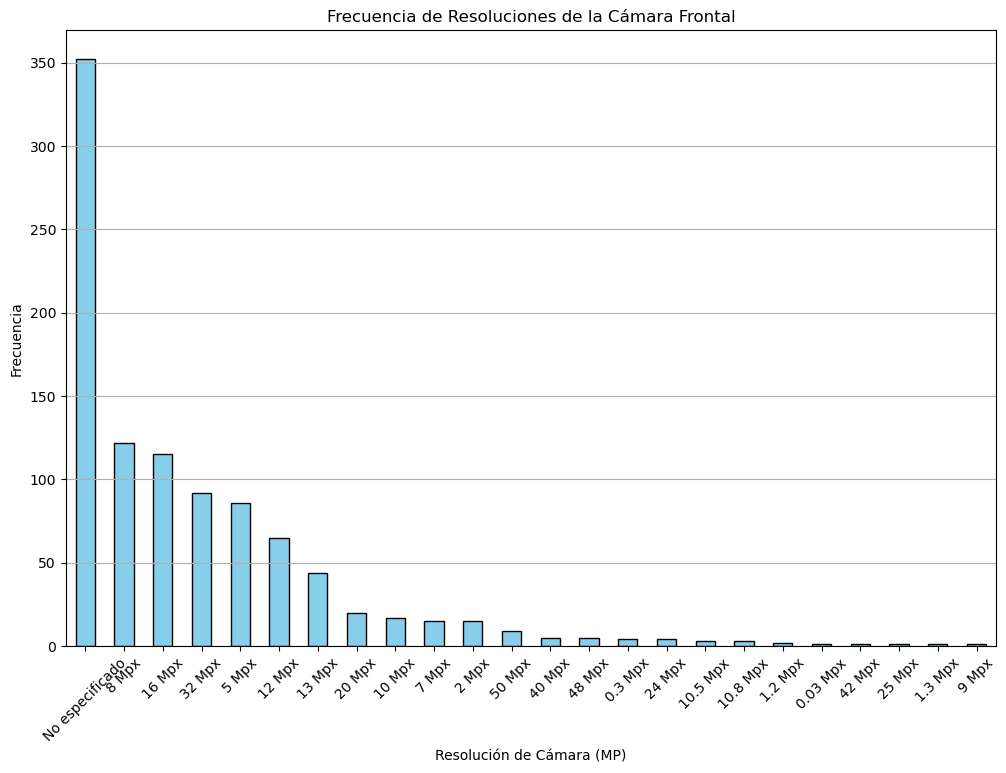

In [93]:
# Contar las ocurrencias de cada valor único en MAIN_FRONT_CAMERA_RESOLUTION
conteo_resoluciones = celulares_df['MAIN_FRONT_CAMERA_RESOLUTION'].value_counts()

# Crear el diagrama de barras
plt.figure(figsize=(12, 8))
conteo_resoluciones.plot(kind='bar', color='skyblue', edgecolor='black')

# Etiquetas y título
plt.title('Frecuencia de Resoluciones de la Cámara Frontal')
plt.xlabel('Resolución de Cámara (MP)')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()


#### Capacidad de la Batería



In [94]:
# Función para extraer la marca del diccionario con 'id' igual a 'BATTERY_CAPACITY'
def extraer_color(attributes):
    if isinstance(attributes, list):  # Verificar si 'attributes' es una lista
        for attribute in attributes:
            if attribute.get('id') == 'BATTERY_CAPACITY':  # Buscar el diccionario con 'id' igual a 'BATTERY_CAPACITY'
                return attribute.get('value_name', 'No especificado')  # Extraer el valor de 'value_name'
    return 'No especificado'  # Devolver 'No especificado' si no se encuentra

# Aplicar la función para crear una nueva columna 'BATTERY_CAPACITY'
celulares_df['BATTERY_CAPACITY'] = celulares_df['attributes'].apply(extraer_color)

# Mostrar las primeras filas con la columna 'BATTERY_CAPACITY' extraída
print(celulares_df[['attributes', 'BATTERY_CAPACITY']].head())

                                          attributes BATTERY_CAPACITY
0  [{'id': 'ACCESSORIES_INCLUDED', 'name': 'Acces...         7800 mAh
1  [{'id': 'ACCESSORIES_INCLUDED', 'name': 'Acces...  No especificado
2  [{'id': 'ACCESSORIES_INCLUDED', 'name': 'Acces...  No especificado
3  [{'id': 'BATTERY_CAPACITY', 'name': 'Capacidad...         5000 mAh
4  [{'id': 'BRAND', 'name': 'Marca', 'value_id': ...  No especificado


In [95]:
#Frecuencia absoluta
celulares_df["BATTERY_CAPACITY"].value_counts(dropna=False, normalize=False)

BATTERY_CAPACITY
5000 mAh           352
No especificado    262
4500 mAh            30
6000 mAh            29
4000 mAh            24
                  ... 
3279 mAh             1
14002 mAh            1
8300 mAh             1
1715 mAh             1
2200 mAh             1
Name: count, Length: 114, dtype: int64

In [96]:
#Frecuencia relativa
celulares_df["BATTERY_CAPACITY"].value_counts(dropna=False, normalize=True)

BATTERY_CAPACITY
5000 mAh           0.357724
No especificado    0.266260
4500 mAh           0.030488
6000 mAh           0.029472
4000 mAh           0.024390
                     ...   
3279 mAh           0.001016
14002 mAh          0.001016
8300 mAh           0.001016
1715 mAh           0.001016
2200 mAh           0.001016
Name: proportion, Length: 114, dtype: float64

#### Capacidad máxima de Memoria

In [97]:
# Función para extraer la marca del diccionario con 'id' igual a 'MEMORY_CARD_MAX_CAPACITY'
def extraer_color(attributes):
    if isinstance(attributes, list):  # Verificar si 'attributes' es una lista
        for attribute in attributes:
            if attribute.get('id') == 'MEMORY_CARD_MAX_CAPACITY':  # Buscar el diccionario con 'id' igual a 'MEMORY_CARD_MAX_CAPACITY'
                return attribute.get('value_name', 'No especificado')  # Extraer el valor de 'value_name'
    return 'No especificado'  # Devolver 'No especificado' si no se encuentra

# Aplicar la función para crear una nueva columna 'MEMORY_CARD_MAX_CAPACITY'
celulares_df['MEMORY_CARD_MAX_CAPACITY'] = celulares_df['attributes'].apply(extraer_color)

# Mostrar las primeras filas con la columna 'MEMORY_CARD_MAX_CAPACITY' extraída
print(celulares_df[['attributes', 'MEMORY_CARD_MAX_CAPACITY']].head())

                                          attributes MEMORY_CARD_MAX_CAPACITY
0  [{'id': 'ACCESSORIES_INCLUDED', 'name': 'Acces...          No especificado
1  [{'id': 'ACCESSORIES_INCLUDED', 'name': 'Acces...          No especificado
2  [{'id': 'ACCESSORIES_INCLUDED', 'name': 'Acces...          No especificado
3  [{'id': 'BATTERY_CAPACITY', 'name': 'Capacidad...          No especificado
4  [{'id': 'BRAND', 'name': 'Marca', 'value_id': ...          No especificado


In [98]:
#Frecuencia absoluta
celulares_df["MEMORY_CARD_MAX_CAPACITY"].value_counts(dropna=False, normalize=False)

MEMORY_CARD_MAX_CAPACITY
No especificado    684
1 TB               154
512 GB              41
128 GB              31
256 GB              31
32 GB               20
2 TB                10
400 GB               5
16 GB                2
64 GB                2
8 GB                 1
1000 GB              1
1 GB                 1
256 MB               1
Name: count, dtype: int64

In [99]:
#Frecuencia relativa
celulares_df["MEMORY_CARD_MAX_CAPACITY"].value_counts(dropna=False, normalize=True)

MEMORY_CARD_MAX_CAPACITY
No especificado    0.695122
1 TB               0.156504
512 GB             0.041667
128 GB             0.031504
256 GB             0.031504
32 GB              0.020325
2 TB               0.010163
400 GB             0.005081
16 GB              0.002033
64 GB              0.002033
8 GB               0.001016
1000 GB            0.001016
1 GB               0.001016
256 MB             0.001016
Name: proportion, dtype: float64

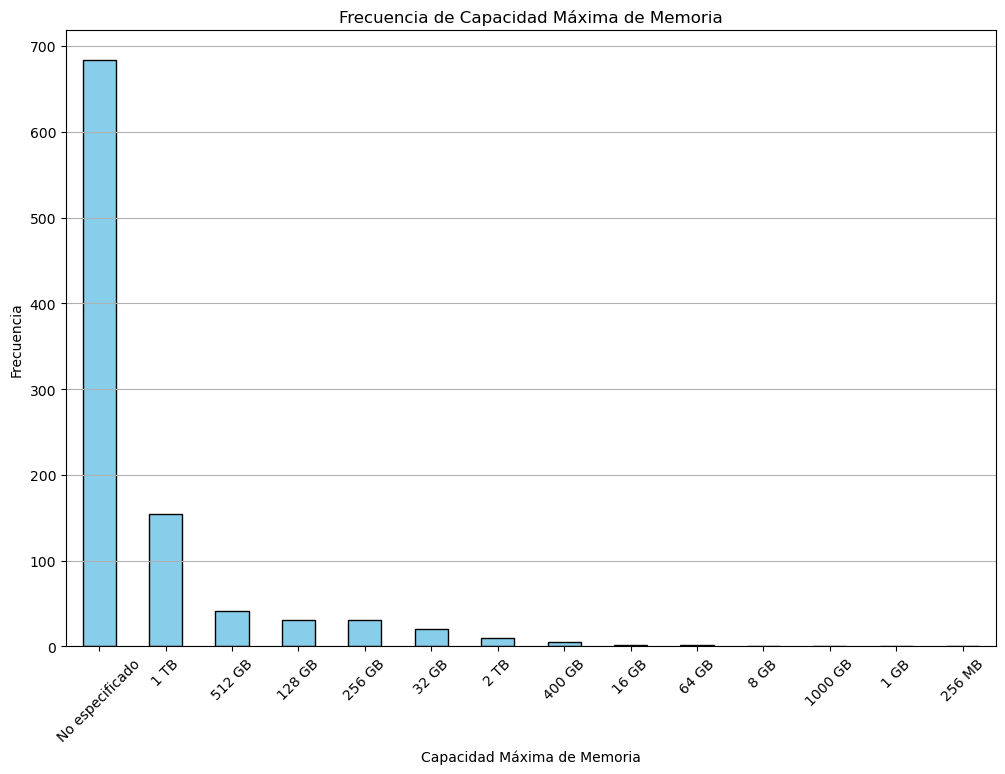

In [100]:
# Contar las ocurrencias de cada valor único en MEMORY_CARD_MAX_CAPACITY
conteo_resoluciones = celulares_df['MEMORY_CARD_MAX_CAPACITY'].value_counts()

# Crear el diagrama de barras
plt.figure(figsize=(12, 8))
conteo_resoluciones.plot(kind='bar', color='skyblue', edgecolor='black')

# Etiquetas y título
plt.title('Frecuencia de Capacidad Máxima de Memoria')
plt.xlabel('Capacidad Máxima de Memoria')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

### 5. Análisis Bivariado

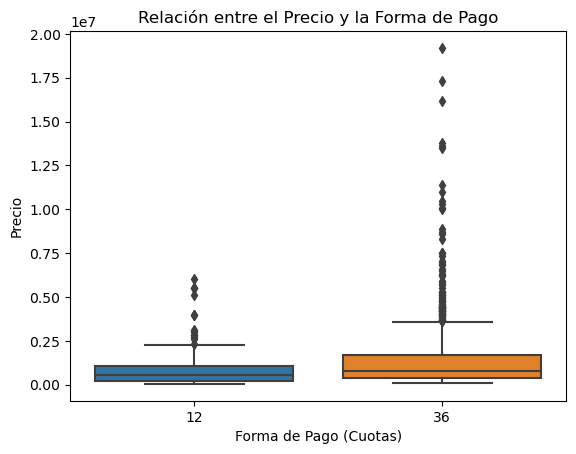

In [101]:
# Relación entre precio y cantidad de cuotas a pagar
sns.boxplot(x='quantity', y='price', data=caracteristicas_df)
plt.title('Relación entre el Precio y la Forma de Pago')
plt.xlabel('Forma de Pago (Cuotas)')
plt.ylabel('Precio')
plt.show()

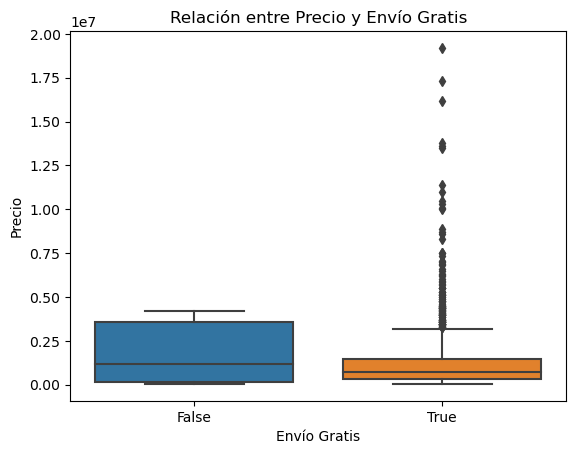

In [102]:
# Relación entre precio y si tiene envío gratis
sns.boxplot(x='envio_gratis', y='price', data=caracteristicas_df)
plt.title('Relación entre Precio y Envío Gratis')
plt.xlabel('Envío Gratis')
plt.ylabel('Precio')
plt.show()

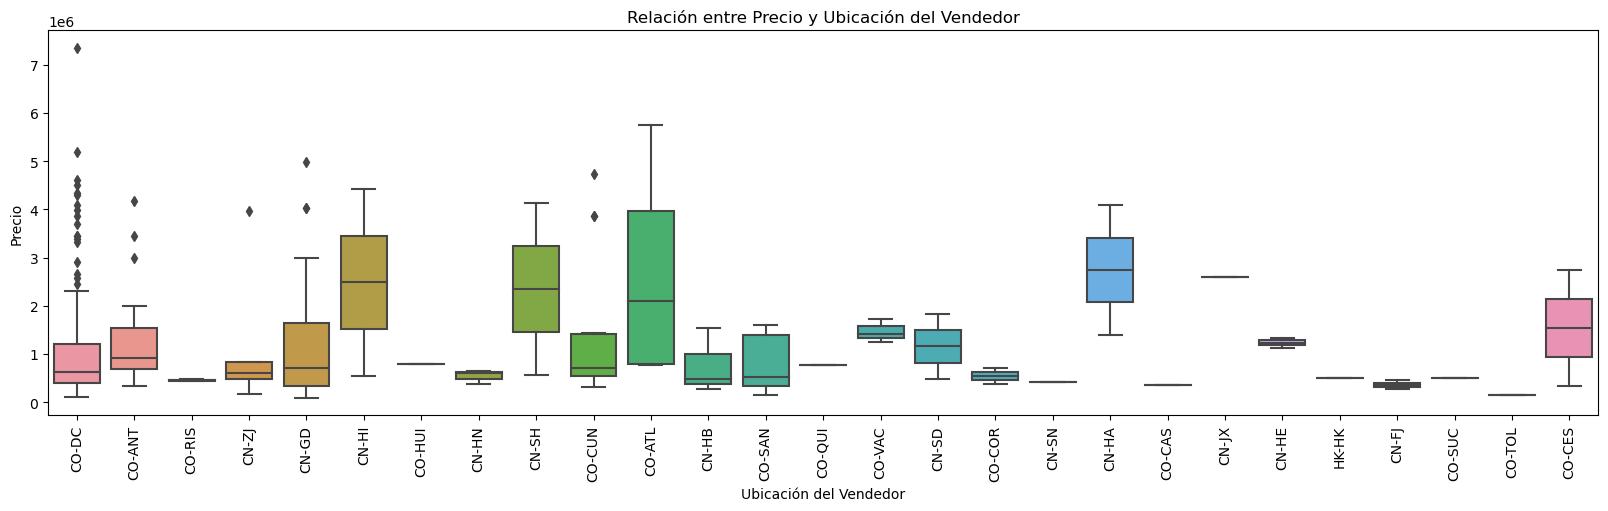

In [103]:
# Relación entre precio y ubicación del vendedor
plt.figure(figsize=(20, 5))
sns.boxplot(x=vendedores_df['state'], y=caracteristicas_df['price'])
plt.title('Relación entre Precio y Ubicación del Vendedor')
plt.xlabel('Ubicación del Vendedor')
plt.ylabel('Precio')
plt.xticks(rotation=90)
plt.show()

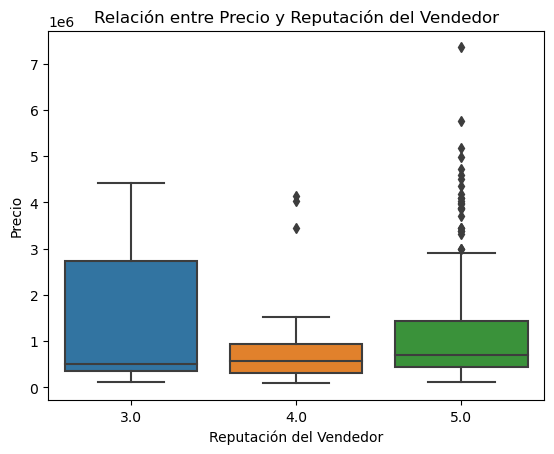

In [104]:
# Relación entre precio y reputación del vendedor
sns.boxplot(x=vendedores_df['level_id_num'], y=caracteristicas_df['price'])
plt.title('Relación entre Precio y Reputación del Vendedor')
plt.xlabel('Reputación del Vendedor')
plt.ylabel('Precio')
plt.show()

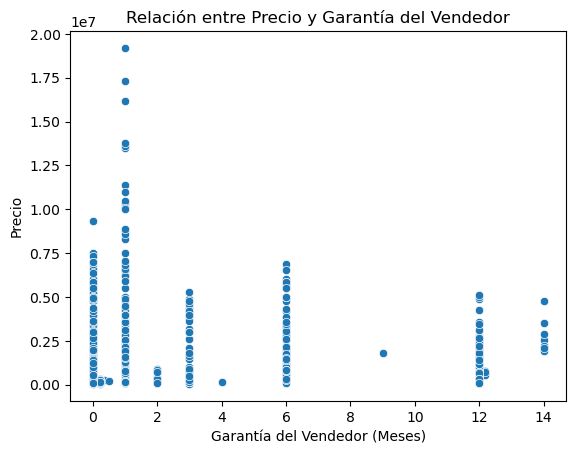

In [105]:
# Relación entre precio y garantía del vendedor
sns.scatterplot(x='garantia_vendedor_meses', y='price', data=celulares_df)
plt.title('Relación entre Precio y Garantía del Vendedor')
plt.xlabel('Garantía del Vendedor (Meses)')
plt.ylabel('Precio')
plt.show()

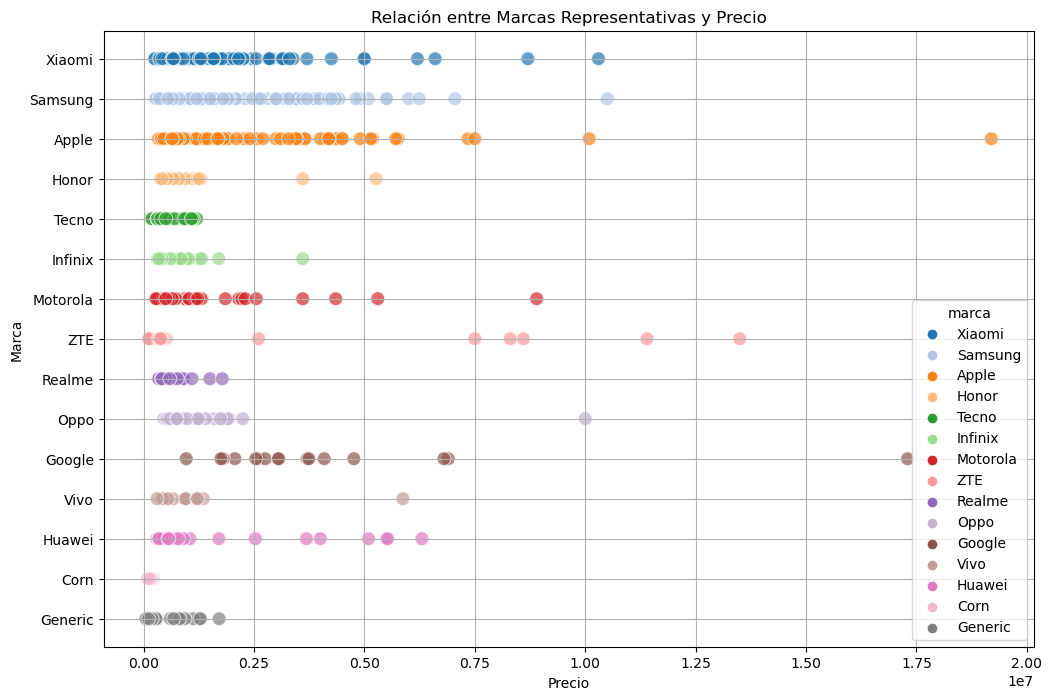

In [106]:
# Relación entre marca y precio
marcas_representantivas = ['Xiaomi', 'Samsung', 'Motorola', 'Apple', 'Tecno', 'Generic', 'ZTE', 'Infinix', 'Oppo', 'Corn', 'Honor', 'Huawei', 'Realme', 'Vivo', 'Google']

# Filtrar el DataFrame para incluir solo las marcas representativas
df_filtrado = caracteristicas_df[caracteristicas_df['marca'].isin(marcas_representantivas)]

# Crear un diagrama de dispersión para ver la relación entre marca y precio
plt.figure(figsize=(12, 8))
sns.scatterplot(x='price', y='marca', data=df_filtrado, hue='marca', palette='tab20', s=100, alpha=0.7)

# Etiquetas y título
plt.title('Relación entre Marcas Representativas y Precio')
plt.xlabel('Precio')
plt.ylabel('Marca')

# Mostrar el gráfico
plt.grid(True)
plt.show()

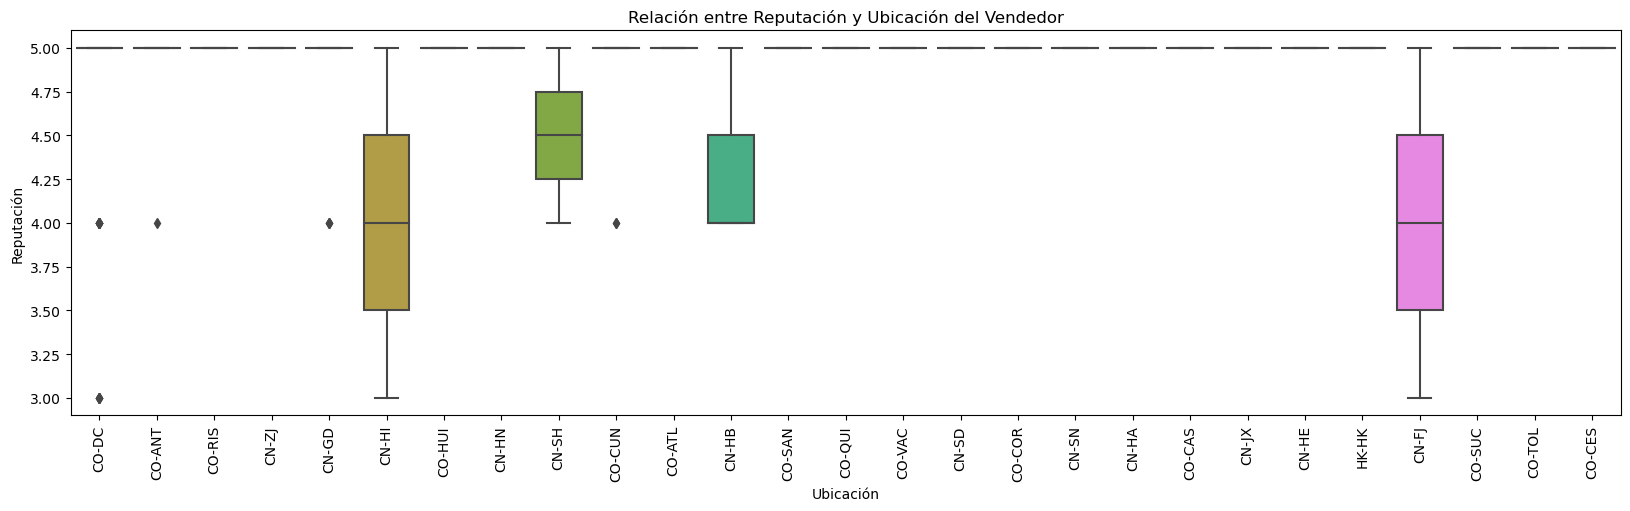

In [107]:
# Relación entre reputación y ubicación del vendedor
plt.figure(figsize=(20, 5))
sns.boxplot(x='state', y='level_id_num', data=vendedores_df)
plt.title('Relación entre Reputación y Ubicación del Vendedor')
plt.xlabel('Ubicación')
plt.ylabel('Reputación')
plt.xticks(rotation=90)
plt.show()

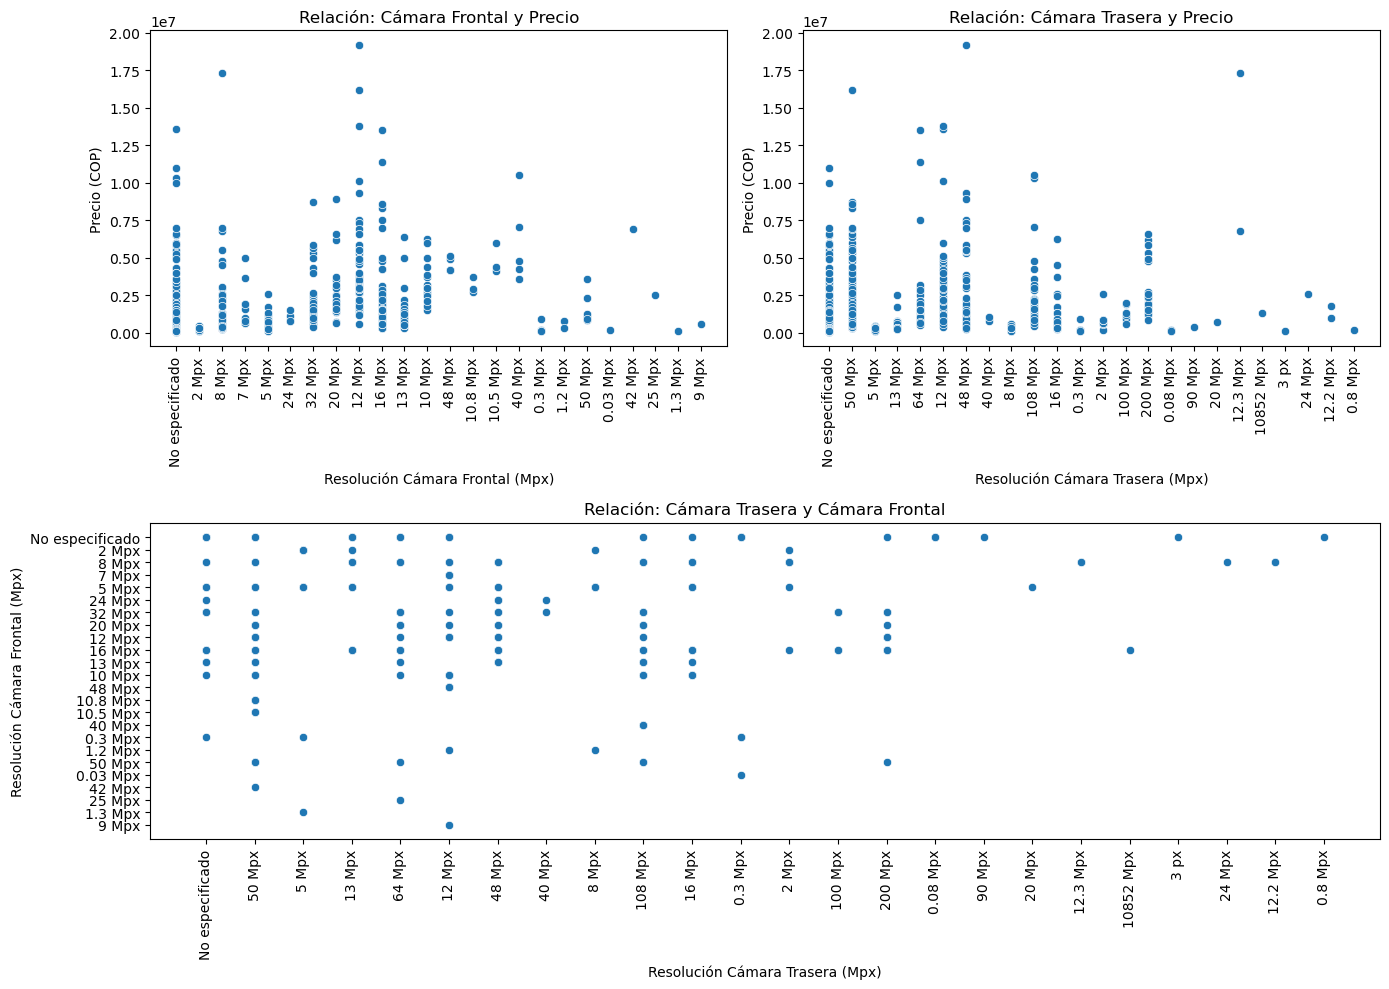

In [108]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(14, 10))

# Crear la cuadrícula de gráficos (2x2, donde el último gráfico ocupará la segunda fila completa)
grid = plt.GridSpec(2, 2, height_ratios=[1, 1])

# Gráfico 1: Relación entre MAIN_FRONT_CAMERA_RESOLUTION y PRICE (arriba izquierda)
plt.subplot(grid[0, 0])
sns.scatterplot(x='MAIN_FRONT_CAMERA_RESOLUTION', y='price', data=celulares_df)
plt.title('Relación: Cámara Frontal y Precio')
plt.xlabel('Resolución Cámara Frontal (Mpx)')
plt.ylabel('Precio (COP)')
plt.xticks(rotation=90)

# Gráfico 2: Relación entre MAIN_REAR_CAMERA_RESOLUTION y PRICE (arriba derecha)
plt.subplot(grid[0, 1])
sns.scatterplot(x='MAIN_REAR_CAMERA_RESOLUTION', y='price', data=celulares_df)
plt.title('Relación: Cámara Trasera y Precio')
plt.xlabel('Resolución Cámara Trasera (Mpx)')
plt.ylabel('Precio (COP)')
plt.xticks(rotation=90)

# Gráfico 3: Relación entre MAIN_REAR_CAMERA_RESOLUTION y MAIN_FRONT_CAMERA_RESOLUTION (abajo)
plt.subplot(grid[1, :])  # Ocupa todo el ancho de la segunda fila
sns.scatterplot(x='MAIN_REAR_CAMERA_RESOLUTION', y='MAIN_FRONT_CAMERA_RESOLUTION', data=celulares_df)
plt.title('Relación: Cámara Trasera y Cámara Frontal')
plt.xlabel('Resolución Cámara Trasera (Mpx)')
plt.ylabel('Resolución Cámara Frontal (Mpx)')
plt.xticks(rotation=90)

# Ajustar el diseño para que no se solapen los títulos y etiquetas
plt.tight_layout()
plt.show()


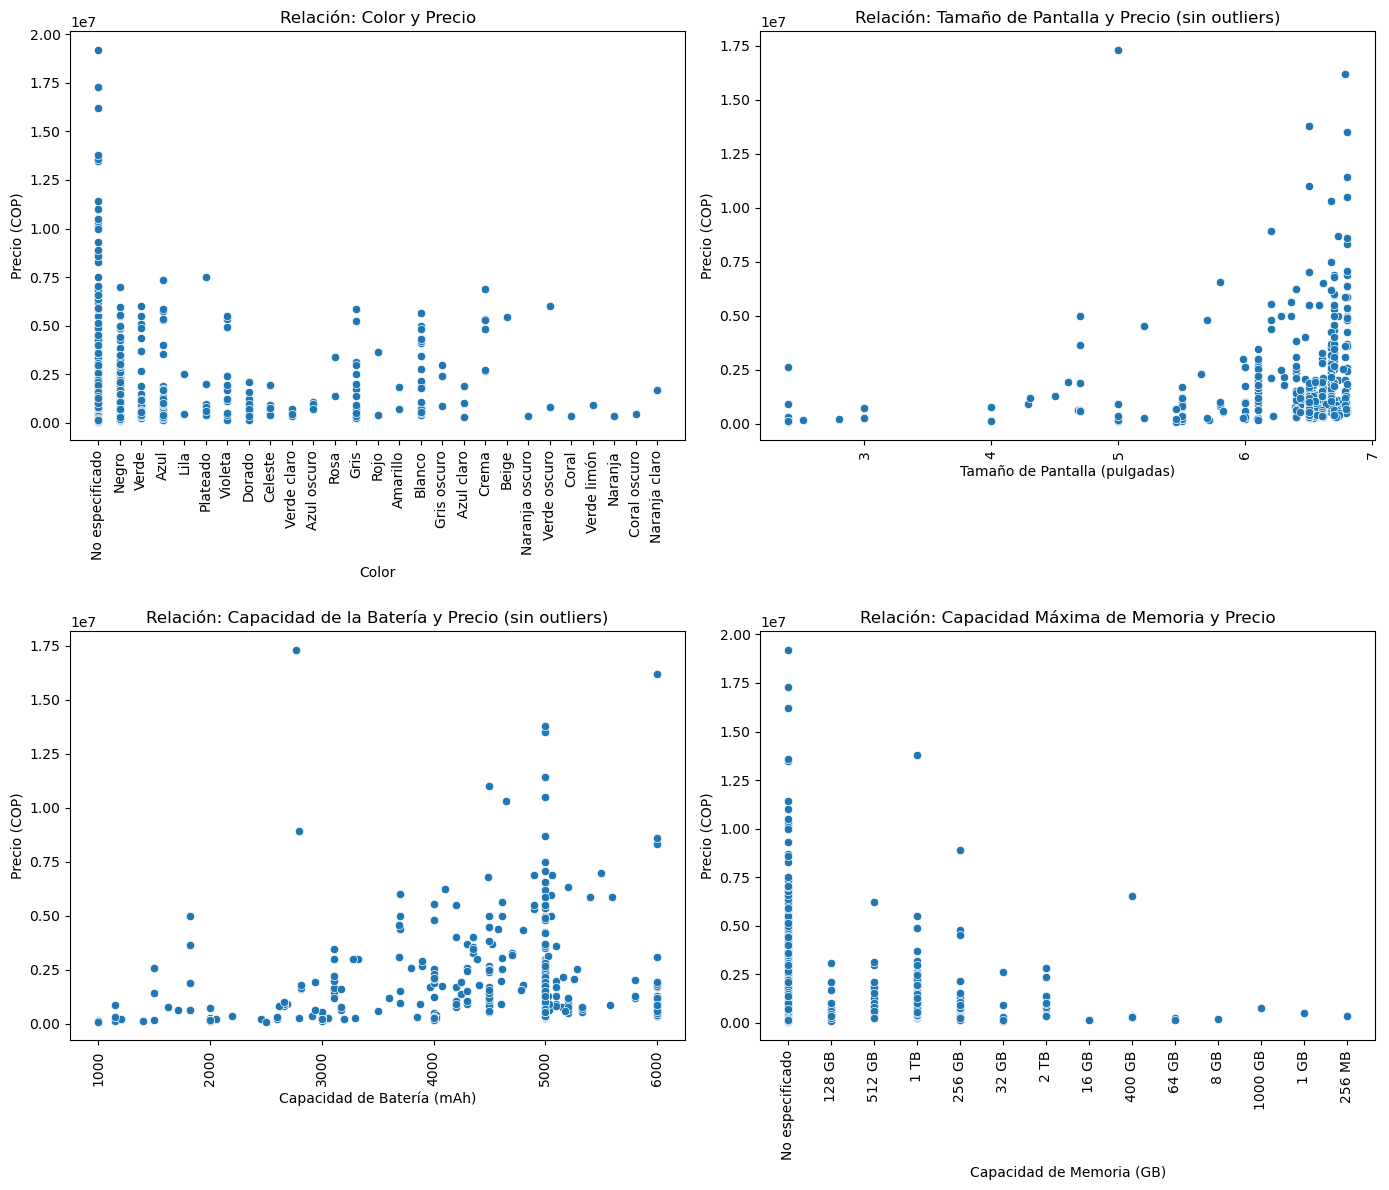

In [109]:
# Limpiar y convertir BATTERY_CAPACITY
def convert_battery_capacity(value):
    if pd.isna(value) or 'No especificado' in str(value):
        return np.nan
    if 'mAh' in str(value):
        return float(str(value).replace(' mAh', '').replace(',', ''))
    return np.nan

celulares_df['BATTERY_CAPACITY_num'] = celulares_df['BATTERY_CAPACITY'].apply(convert_battery_capacity)

# Filtrar outliers usando cuantiles para BATTERY_CAPACITY y DISPLAY_SIZE_pulgadas
filtered_df = celulares_df[
    (celulares_df['BATTERY_CAPACITY_num'].between(celulares_df['BATTERY_CAPACITY_num'].quantile(0.05), celulares_df['BATTERY_CAPACITY_num'].quantile(0.95))) &
    (celulares_df['DISPLAY_SIZE_pulgadas'].between(celulares_df['DISPLAY_SIZE_pulgadas'].quantile(0.05), celulares_df['DISPLAY_SIZE_pulgadas'].quantile(0.95)))
]

# Ajustar el tamaño de la figura
plt.figure(figsize=(14, 12))

# Crear la cuadrícula de gráficos 2x2
grid = plt.GridSpec(2, 2)

# Gráfico 1: Relación entre MAIN_COLOR y PRICE (arriba izquierda)
plt.subplot(grid[0, 0])
sns.scatterplot(x='MAIN_COLOR', y='price', data=celulares_df)
plt.title('Relación: Color y Precio')
plt.xlabel('Color')
plt.ylabel('Precio (COP)')
plt.xticks(rotation=90)

# Gráfico 2: Relación entre DISPLAY_SIZE_pulgadas (sin outliers) y PRICE (arriba derecha)
plt.subplot(grid[0, 1])
sns.scatterplot(x='DISPLAY_SIZE_pulgadas', y='price', data=filtered_df)
plt.title('Relación: Tamaño de Pantalla y Precio (sin outliers)')
plt.xlabel('Tamaño de Pantalla (pulgadas)')
plt.ylabel('Precio (COP)')
plt.xticks(rotation=90)

# Gráfico 3: Relación entre BATTERY_CAPACITY (sin outliers) y PRICE (abajo izquierda)
plt.subplot(grid[1, 0])
sns.scatterplot(x='BATTERY_CAPACITY_num', y='price', data=filtered_df)
plt.title('Relación: Capacidad de la Batería y Precio (sin outliers)')
plt.xlabel('Capacidad de Batería (mAh)')
plt.ylabel('Precio (COP)')
plt.xticks(rotation=90)

# Gráfico 4: Relación entre MEMORY_CARD_MAX_CAPACITY y PRICE (abajo derecha)
plt.subplot(grid[1, 1])
sns.scatterplot(x='MEMORY_CARD_MAX_CAPACITY', y='price', data=celulares_df)
plt.title('Relación: Capacidad Máxima de Memoria y Precio')
plt.xlabel('Capacidad de Memoria (GB)')
plt.ylabel('Precio (COP)')
plt.xticks(rotation=90)

# Ajustar el diseño para que no se solapen los gráficos y etiquetas
plt.tight_layout()
plt.show()



### Insights

Del análisis univariado se obtuvieron los siguientes hallazgos: 

- El precio promedio de los celulares es de 1.5 millones de pesos pero la desviación estándar elevada indica que hay una gran variabilidad en los precios, desde dispositivos muy baratos (menos de $50.000 pesos) hasta algunos muy caros (casi 20 millones de pesos). Sin embargo, de acuerdo con la mediana la mayoría de los celulares están en un rango relativamente accesible, con la mitad de los celulares costando menos de $800.000 pesos.

- En cuanto al método de pago, para todos los celulares es posible realizar un pago a cuotas con un rango de entre 12 a 36 cuotas. 

- El envío gratuito es un factor común en la venta de celulares, ya que aplica para el 99% de los casos.

- Los vendedores se encuentran distribuidos por todo Colombia, sin embargo, se evidencia una concentración de aproximadamente el 50% en la ciudad de Bogotá D.C

- Los vendedores están calificados en un rango de 3 a 5 puntos. Adicionalmente, los calificados con 5 puntos, que corresponde al 86% de los vendedores aproximadamente, cuentan con una clasificación entre "gold, platinum y silver".

- Los celulares cuentan con dos tipos de garantías, la de fábrica y la de los vendedores. Se evidencia que la garatía ofrecida por los vendedores en su mayoría es inferior a los dos meses, sin embargo, hay vendedores que ofrencen garantías más prolongadas, desde 6 meses hasta un poco más del año, siendo un valor agregado al perfil del vendedor.

Dentro de las características específicas del dispositivo consideradas relevantes al momento de tomar la decisión de compra se identificó lo siguiente: 

- El 98% de los dispositivos son nuevos.
- Hay una gran variedad de marcas en el mercado, 80 en total, de las cuales 15 son representativas al abarcar el 80% del mercado. 
- En cuanto al color, el tamallo de la pantalla, la resolución de las cámaras, la capacidad de la batería y la capacidad máxima de memoria, se evidencia que prevalecen los valores no especificados. Siendo estas características fundamentales al momento de tomar una decisión de compra.  

Del análisis bivariado se obtuvieron los siguientes hallazgos:

- La relación del precio con la cantidad de cuotas disponibles para pago muestra que a mayor valor del dispositivo mayor tiempo disponible para diferir los pagos, hasta 36 cuotas. 

- La relación entre reputación del vendedor y precio evidencia que los vendedores con calificación máxima tienen la mayor variabilidad en la oferta de celulares de diferentes gamas de precio. Adicionalmente, los dispositivos más costosos son ofrecidos únicamente por vendedores con la más alta calificación. 

- En cuanto a la garantía, se evidencia que los celulares más costosos tienen menos de 2 meses de garantía y los celulares con mayor tiempo de garantía se encuentran en un rango de precio medio a bajo. 

- El gráfico de relación entre precio y ubicación del vendedor indica que el precio de los celulares varía considerablemente en función de la ubicación del vendedor, por ejemplo, en zonas como "CO-DC", "CO-ANT" y "CO-ATL" se presenta más variabilidad y casos de precios altos, mientras que en otras áreas como "CO-RIS" y "CN-HN" los precios tienden a ser más homogéneos y bajos.

- Con respecto a la relación entre reputación y ubicación del vendedor, se evidencia que en las zonas de "CN-HI", "CN-SH", "CN-HB" y "CN-FJ" se encuentran los vendedores con más baja reputación, mientras que en las demás áreas las calificaciones se concentran en el rango de 5. 

- La relación entre marcas y precios ilustra claramente que las marcas como Apple tienden a vender productos más caros, mientras que otras marcas como Xiaomi, Samsung, Motorola y Realme ofrecen una gama más amplia de precios, con muchos productos asequibles. 

- En el análisis entre las resoluciones de las cámaras y el precio, se evidencia que a mayor resolución mayor precio. Por otro lado, no se evidencia una relación clara entre los Mpx de la cámara trasera y la frontal.

- La interpretación que se le puede dar al gráfico que presenta cuatro subgráficos que muestran diferentes relaciones entre variables clave (color, tamaño de pantalla, capacidad de la batería, capacidad máxima de memoria) y el precio de los celulares se puede resumir de la siguiente manera: 
    - El color no tiene un impacto significativo en el precio ya que la variabilidad de precios es grande independientemente del color del dispositivo.
    - El tamaño de la pantalla influye en el precio, con pantallas más grandes generalmente asociadas a celulares más caros.
    - Aunque hay cierta relación entre una mayor capacidad de la batería y el precio, esta no es una relación completamente directa.
    - La capacidad de almacenamiento es un factor importante en el precio, donde mayor capacidad tiende a significar mayor precio.




#### ¿Qué tantas opciones (variabilidad) en función de la marca, precio u otros dos atributos relevantes hay en los celulares disponibles?

De acuerdo con el análisis realizado y los insights obtenidos se puede concluir que existe una alta variabilidad en los celulares disponibles al considerar la marca, el precio y atributos como el color o la capacidad de memoria y batería, lo que refleja el avance tecnológico, la diversidad y la competencia en el mercado de dispositivos móviles. 

### 6. Estratégia de Recomendación

Los pasos implementados para seleccionar el celular ideal para mamá son los siguientes: 

1. Se definen las condiciones de compra deseadas 
    - Precio máximo: 1.200.000
    - Reputación vendedor (level_id_num) = 5
    - Ubicación vendedor (state) = CO-DC o CO-CUN
    - Garantía (garantía_vendedor_meses) >= 6 meses
    - Envío gratis (envio_gratis) = True
    - Condición (condition) = new

2. Una vez aplicado este primer filtro, se realiza una selección final de los celulares que cuentan con información en los atributos tamaño de la pantalla, resolución de las cámaras, capacidad de la batería y capacidad de almacenamiento. 

Esta información es importante ya que mamá merece lo mejor y, aunque no es muy tecnológica, disfruta mucho tomar fotos por lo que requiere un celular con buen almacenamiento, gran calidad de cámaras y pantalla, así como durabilidad en el tiempo de uso. 

3. Finalmente, de las opciones restantes se selecciona el que presente mejores características. 



In [110]:
# Filtrar los celulares que cumplen con las condiciones especificadas

# Filtro de precio
filtro_precio = celulares_df['price'] <= 1200000

# Filtro de reputación del vendedor
filtro_reputacion = vendedores_df['level_id_num'] == 5

# Filtro de ubicación del vendedor
filtro_ubicacion = vendedores_df['state'].isin(['CO-DC', 'CO-CUN'])

# Filtro de garantía (mínimo 6 meses)
filtro_garantia = celulares_df['garantia_vendedor_meses'] >= 6

# Filtro de envío gratis
filtro_envio_gratis = caracteristicas_df['envio_gratis'] == True

# Filtro de condición (nuevo)
filtro_condicion = celulares_df['condition'] == 'new'

# Aplicar todos los filtros
celulares_filtrados = celulares_df[
    filtro_precio &
    filtro_reputacion &
    filtro_ubicacion &
    filtro_garantia &
    filtro_envio_gratis &
    filtro_condicion
]


In [111]:
celulares_filtrados.shape

(12, 50)

In [112]:
celulares_filtrados.sample(12)

,id,site_id,title,seller_id,category_id,official_store_id,price,base_price,currency_id,initial_quantity,sale_terms,buying_mode,listing_type_id,condition,permalink,thumbnail_id,thumbnail,pictures,descriptions,accepts_mercadopago,non_mercado_pago_payment_methods,shipping,international_delivery_mode,seller_address,location,coverage_areas,attributes,listing_source,variations,status,sub_status,tags,warranty,catalog_product_id,domain_id,deal_ids,automatic_relist,date_created,last_updated,health,catalog_listing,garantia_vendedor_meses,MAIN_COLOR,DISPLAY_SIZE,DISPLAY_SIZE_pulgadas,MAIN_REAR_CAMERA_RESOLUTION,MAIN_FRONT_CAMERA_RESOLUTION,BATTERY_CAPACITY,MEMORY_CARD_MAX_CAPACITY,BATTERY_CAPACITY_num
111,MCO2319587914,MCO,Xiaomi Redmi Note 13 Dual Sim 256gb/8gb + Mi B...,52392766,MCO1055,NaN,1074875,1074875,COP,6,"[{'id': 'WARRANTY_TYPE', 'name': 'Tipo de gara...",buy_it_now,gold_special,new,https://articulo.mercadolibre.com.co/MCO-23195...,738192-MCO75768497545_042024,http://http2.mlstatic.com/D_738192-MCO75768497...,"[{'id': '738192-MCO75768497545_042024', 'url':...",[],True,[],"{'mode': 'me2', 'methods': [], 'tags': ['self_...",none,"{'city': {'id': 'TUNPQ1RFVTY1OTk1', 'name': 'T...",{},[],"[{'id': 'ACCESSORIES_INCLUDED', 'name': 'Acces...",,"[{'id': 180281526798, 'price': 1074875, 'attri...",active,[],"[good_quality_thumbnail, standard_price_by_cha...",Garantía del vendedor: 6 meses,None,MCO-CELLPHONES,[],False,2024-04-11T12:57:35.747Z,2024-09-16T05:02:38.565Z,0.90,False,6.0,No especificado,No especificado,NaN,No especificado,16 Mpx,5000 mAh,No especificado,5000.0
6,MCO2602949080,MCO,Zte Blade A5 2020 Dual Sim 32 Gb Verde 2 Gb Ram,1536284902,MCO1055,NaN,219900,219900,COP,68,"[{'id': 'WARRANTY_TYPE', 'name': 'Tipo de gara...",buy_it_now,gold_special,new,https://articulo.mercadolibre.com.co/MCO-26029...,755098-MLA46968358876_082021,http://http2.mlstatic.com/D_755098-MLA46968358...,"[{'id': '755098-MLA46968358876_082021', 'url':...",[],True,[],"{'mode': 'me2', 'methods': [], 'tags': ['self_...",none,"{'city': {'id': 'TUNPQ0NPVGFiYzZm', 'name': 'C...",{},[],"[{'id': 'BATTERY_CAPACITY', 'name': 'Capacidad...",,[],active,[],"[good_quality_thumbnail, immediate_payment, ca...",Garantía del vendedor: 12 meses,MCO16518533,MCO-CELLPHONES,[],False,2024-08-09T03:17:15.851Z,2024-09-24T19:01:16.326Z,NaN,True,12.0,Verde,"6.088 """,6.088000,13 Mpx,8 Mpx,3200 mAh,512 GB,3200.0
12,MCO2614981128,MCO,Motorola G72 128gb /6gb Ram + Audífonos Genius...,52392766,MCO1055,NaN,549900,549900,COP,10,"[{'id': 'WARRANTY_TYPE', 'name': 'Tipo de gara...",buy_it_now,gold_special,new,https://articulo.mercadolibre.com.co/MCO-26149...,853047-MCO78446131279_082024,http://http2.mlstatic.com/D_853047-MCO78446131...,"[{'id': '853047-MCO78446131279_082024', 'url':...",[],True,[],"{'mode': 'me2', 'methods': [], 'tags': ['self_...",none,"{'city': {'id': 'TUNPQ1RFVTY1OTk1', 'name': 'T...",{},[],"[{'id': 'ACCESSORIES_INCLUDED', 'name': 'Acces...",,"[{'id': 181380684146, 'price': 549900, 'attrib...",active,[],"[standard_price_by_channel, good_quality_thumb...",Garantía del vendedor: 6 meses,None,MCO-CELLPHONES,[],False,2024-08-15T19:28:44.480Z,2024-09-16T16:57:28.912Z,0.90,False,6.0,No especificado,No especificado,NaN,No especificado,No especificado,No especificado,No especificado,NaN
78,MCO843869984,MCO,iPhone SE 2020 64gb Negro Apple Reacondicionado,1022370671,MCO1055,NaN,649900,649900,COP,10,"[{'id': 'WARRANTY_TYPE', 'name': 'Tipo de gara...",buy_it_now,gold_pro,new,https://articulo.mercadolibre.com.co/MCO-84386...,799627-MCO77065161533_062024,http://http2.mlstatic.com/D_799627-MCO77065161...,"[{'id': '799627-MCO77065161533_062024', 'url':...",[],True,[],"{'mode': 'me2', 'methods': [], 'tags': ['manda...",none,"{'city': {'id': 'TUNPQ0JBUjEyNTcx', 'name': 'B...",{},[],"[{'id': 'BATTERY_CAPACITY', 'name': 'Capacidad...",,"[{'id': 174029056897, 'price': 649900, 'attrib...",active,[],"[good_quality_thumbnail, immediate_payment, ca...",Garantía del vendedor: 12 meses,MCO15591330,MC

In [113]:
# Filtrar los celulares que tienen información en las variables clave
# Convertir la columna MEMORY_CARD_MAX_CAPACITY a tipo numérico, eliminando los "No especificado"
celulares_filtrados['MEMORY_CARD_MAX_CAPACITY'] = celulares_filtrados['MEMORY_CARD_MAX_CAPACITY'].replace('No especificado', np.nan)

# Usamos 'notna()' para verificar que no sean nulos o vacíos

filtro_completo = (
    celulares_filtrados['DISPLAY_SIZE_pulgadas'].notna() &
    celulares_filtrados['MAIN_REAR_CAMERA_RESOLUTION'].notna() &
    celulares_filtrados['MAIN_FRONT_CAMERA_RESOLUTION'].notna() &
    celulares_filtrados['BATTERY_CAPACITY'].notna() &
    celulares_filtrados['MEMORY_CARD_MAX_CAPACITY'].notna()
)

# Aplicar el filtro a los celulares previamente filtrados
celulares_seleccionados = celulares_filtrados[filtro_completo]




C:\Users\lperd\AppData\Local\Temp\ipykernel_6484\873367274.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  celulares_filtrados['MEMORY_CARD_MAX_CAPACITY'] = celulares_filtrados['MEMORY_CARD_MAX_CAPACITY'].replace('No especificado', np.nan)


In [114]:
celulares_seleccionados.shape

(3, 50)

In [115]:
celulares_seleccionados.sample(3)

,id,site_id,title,seller_id,category_id,official_store_id,price,base_price,currency_id,initial_quantity,sale_terms,buying_mode,listing_type_id,condition,permalink,thumbnail_id,thumbnail,pictures,descriptions,accepts_mercadopago,non_mercado_pago_payment_methods,shipping,international_delivery_mode,seller_address,location,coverage_areas,attributes,listing_source,variations,status,sub_status,tags,warranty,catalog_product_id,domain_id,deal_ids,automatic_relist,date_created,last_updated,health,catalog_listing,garantia_vendedor_meses,MAIN_COLOR,DISPLAY_SIZE,DISPLAY_SIZE_pulgadas,MAIN_REAR_CAMERA_RESOLUTION,MAIN_FRONT_CAMERA_RESOLUTION,BATTERY_CAPACITY,MEMORY_CARD_MAX_CAPACITY,BATTERY_CAPACITY_num
20,MCO1727901948,MCO,Samsung Reacondicionado Galaxy A12 Negro 128gb,1022370671,MCO1055,NaN,349900,349900,COP,5,"[{'id': 'WARRANTY_TYPE', 'name': 'Tipo de gara...",buy_it_now,gold_special,new,https://articulo.mercadolibre.com.co/MCO-17279...,972257-MCO74849504909_032024,http://http2.mlstatic.com/D_972257-MCO74849504...,"[{'id': '972257-MCO74849504909_032024', 'url':...",[],True,[],"{'mode': 'me2', 'methods': [], 'tags': ['manda...",none,"{'city': {'id': 'TUNPQ0JBUjEyNTcx', 'name': 'B...",{},[],"[{'id': 'BATTERY_CAPACITY', 'name': 'Capacidad...",,"[{'id': 178270134226, 'price': 349900, 'attrib...",active,[],"[good_quality_thumbnail, immediate_payment, ca...",Garantía del vendedor: 12 meses,MCO16926687,MCO-CELLPHONES,[],False,2023-07-21T13:43:16.328Z,2024-09-22T01:17:14.560Z,0.72,False,12.0,No especificado,"6.5 """,6.500,48 Mpx,8 Mpx,5000 mAh,1 TB,5000.0
6,MCO2602949080,MCO,Zte Blade A5 2020 Dual Sim 32 Gb Verde 2 Gb Ram,1536284902,MCO1055,NaN,219900,219900,COP,68,"[{'id': 'WARRANTY_TYPE', 'name': 'Tipo de gara...",buy_it_now,gold_special,new,https://articulo.mercadolibre.com.co/MCO-26029...,755098-MLA46968358876_082021,http://http2.mlstatic.com/D_755098-MLA46968358...,"[{'id': '755098-MLA46968358876_082021', 'url':...",[],True,[],"{'mode': 'me2', 'methods': [], 'tags': ['self_...",none,"{'city': {'id': 'TUNPQ0NPVGFiYzZm', 'name': 'C...",{},[],"[{'id': 'BATTERY_CAPACITY', 'name': 'Capacidad...",,[],active,[],"[good_quality_thumbnail, immediate_payment, ca...",Garantía del vendedor: 12 meses,MCO16518533,MCO-CELLPHONES,[],False,2024-08-09T03:17:15.851Z,2024-09-24T19:01:16.326Z,NaN,True,12.0,Verde,"6.088 """,6.088,13 Mpx,8 Mpx,3200 mAh,512 GB,3200.0
49,MCO1410455245,MCO,Samsung Reacondicionado Galaxy A03 Core Azul 32gb,1022370671,MCO1055,NaN,249900,249900,COP,5,"[{'id': 'WARRANTY_TYPE', 'name': 'Tipo de gara...",buy_it_now,gold_pro,new,https://articulo.mercadolibre.com.co/MCO-14104...,944489-MCO75612691097_042024,http://http2.mlstatic.com/D_944489-MCO75612691...,"[{'id': '944489-MCO75612691097_042024', 'url':...",[],True,[],"{'mode': 'me2', 'methods': [], 'tags': ['manda...",none,"{'city': {'id': 'TUNPQ0JBUjEyNTcx', 'name': 'B...",{},[],"[{'id': 'ACCESSORIES_INCLUDED', 'name': 'Acces...",,"[{'id': 180241103466, 'price': 249900, 'attrib...",active,[],"[good_quality_thumbnail, immediate_payment, ca...",Garantía del vendedor: 12 meses,MCO18904836,MCO-CELLPHONES,[],False,2024-04-05T13:40:27.611Z,2024-09-01T20:32:10.293Z,0.90,False,12.0,No especificado,"6.5 """,6.500,8 Mpx,5 Mpx,5000 mAh,1 TB,5000.0


In [116]:
# Filtrar el DataFrame para obtener solo las columnas seleccionadas
columnas_interes = ['id','title','seller_id','price','warranty','DISPLAY_SIZE_pulgadas', 'MAIN_REAR_CAMERA_RESOLUTION', 'MAIN_FRONT_CAMERA_RESOLUTION', 'BATTERY_CAPACITY', 'MEMORY_CARD_MAX_CAPACITY']
celulares_seleccionados = celulares_seleccionados[columnas_interes]


In [117]:
celulares_seleccionados.head()

,id,title,seller_id,price,warranty,DISPLAY_SIZE_pulgadas,MAIN_REAR_CAMERA_RESOLUTION,MAIN_FRONT_CAMERA_RESOLUTION,BATTERY_CAPACITY,MEMORY_CARD_MAX_CAPACITY
6,MCO2602949080,Zte Blade A5 2020 Dual Sim 32 Gb Verde 2 Gb Ram,1536284902,219900,Garantía del vendedor: 12 meses,6.088,13 Mpx,8 Mpx,3200 mAh,512 GB
20,MCO1727901948,Samsung Reacondicionado Galaxy A12 Negro 128gb,1022370671,349900,Garantía del vendedor: 12 meses,6.500,48 Mpx,8 Mpx,5000 mAh,1 TB
49,MCO1410455245,Samsung Reacondicionado Galaxy A03 Core Azul 32gb,1022370671,249900,Garantía del vendedor: 12 meses,6.500,8 Mpx,5 Mpx,5000 mAh,1 TB


#### Prueba estadística

Se aplica la prueba de Mann-Whitney y un análisis descriptivo para comparar precios entre los celulares filtrados y no filtrados.

In [118]:
# Extraer la columna 'price' de ambos dataframes, eliminando cualquier NaN
precios_filtrados = celulares_filtrados['price'].dropna()
precios_completos = celulares_seleccionados['price'].dropna()

# Verificar que ambas muestras tengan datos suficientes
if len(precios_filtrados) > 1 and len(precios_completos) > 1:
    # Aplicar el test de Mann-Whitney U
    u_stat, p_value = stats.mannwhitneyu(precios_filtrados, precios_completos, alternative='two-sided')

    # Mostrar los resultados de la prueba
    print(f"U-statistic: {u_stat}, p-value: {p_value}")

    # Evaluar la significancia estadística
    alpha = 0.05  # Nivel de significancia
    if p_value < alpha:
        print("Hay una diferencia significativa en el precio entre los celulares filtrados y completos.")
    else:
        print("No hay una diferencia significativa en el precio entre los celulares filtrados y completos.")
else:
    print("No hay suficientes datos en una o ambas muestras para realizar la prueba estadística.")



U-statistic: 31.5, p-value: 0.059683311095277955
No hay una diferencia significativa en el precio entre los celulares filtrados y completos.


El resultado sugiere que los precios de los celulares en ambos grupos son similares en términos de distribución, pero la diferencia es cercana al umbral de significancia.

El valor p (0.0597) es ligeramente mayor que 0.05 - Esto significa que, aunque hay una tendencia hacia una diferencia en los precios, la diferencia no es estadísticamente significativa al nivel de significancia comúnmente utilizado (0.05).

In [119]:
# Cálculo de estadísticas descriptivas
estadisticas_filtrados = precios_filtrados.describe()
estadisticas_no_filtrados = precios_completos.describe()

# Mostrar estadísticas descriptivas
print("Estadísticas descriptivas para celulares filtrados:")
print(estadisticas_filtrados)

print("\nEstadísticas descriptivas para celulares no filtrados:")
print(estadisticas_no_filtrados)

Estadísticas descriptivas para celulares filtrados:
count    1.200000e+01
mean     5.697279e+05
std      2.704409e+05
min      2.199000e+05
25%      3.559000e+05
50%      5.999000e+05
75%      7.061250e+05
max      1.074875e+06
Name: price, dtype: float64

Estadísticas descriptivas para celulares no filtrados:
count         3.000000
mean     273233.333333
std       68068.592856
min      219900.000000
25%      234900.000000
50%      249900.000000
75%      299900.000000
max      349900.000000
Name: price, dtype: float64


## Conclusión

El celular ideal es el Samsung Reacondicionado Galaxy A12 Negro 128gb (id - 	MCO1727901948) ya que cumple con todas las condiciones de compra deseadas y cuenta con las mejores características para mamá. 

In [120]:
Regalo_Mamá = celulares_seleccionados[celulares_seleccionados['id'] == 'MCO1727901948']

Regalo_Mamá.head()

,id,title,seller_id,price,warranty,DISPLAY_SIZE_pulgadas,MAIN_REAR_CAMERA_RESOLUTION,MAIN_FRONT_CAMERA_RESOLUTION,BATTERY_CAPACITY,MEMORY_CARD_MAX_CAPACITY
20,MCO1727901948,Samsung Reacondicionado Galaxy A12 Negro 128gb,1022370671,349900,Garantía del vendedor: 12 meses,6.5,48 Mpx,8 Mpx,5000 mAh,1 TB
